In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


### This notebook has 3 parts. 
---Germany
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data
    2.3 Daily ratios 2020
    2.4 Daily ratios 2019

### 3. Part three -  X and Y
    3.1 Earthmover and Jensenshanon
    3.2 Outlier detection and removal
    3.3 Moving average 
    3.4 Testing with other measures of difference
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap



---Poland


# Part one

### 1.1 Reading in the policy data of countries

In [2]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [3]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

country_code          country_name  01Jan2020  02Jan2020  03Jan2020  \
0          ABW                 Aruba        0.0        0.0        0.0   
1          AFG           Afghanistan        0.0        0.0        0.0   
2          AGO                Angola        0.0        0.0        0.0   
3          ALB               Albania        0.0        0.0        0.0   
4          AND               Andorra        0.0        0.0        0.0   
5          ARE  United Arab Emirates        0.0        0.0        0.0   
6          ARG             Argentina        0.0        0.0        0.0   
7          AUS             Australia        0.0        0.0        0.0   
8          AUT               Austria        0.0        0.0        0.0   
9          AZE            Azerbaijan        0.0        0.0        0.0   

   04Jan2020  05Jan2020  06Jan2020  07Jan2020  08Jan2020  ...  06Jul2021  \
0        0.0        0.0        0.0        0.0        0.0  ...        NaN   
1        0.0        0.0        0.0        0.0        0.0  ...        NaN   
2        0.0        0.0        0.0        0.0        0.0  ...        NaN   
3        0.0        0.0        0.0        0.0        0.0  ...        0.0   
4        0.0        0.0        0.0        0.0        0.0  ...        NaN   
5        0.0        0.0        0.0        0.0        0.0  ...        NaN   
6        0.0        0.0        0.0        0.0        0.0  ...        4.0   
7        0.0        0.0        0.0        0.0        0.0  ...        4.0   
8        0.0        0.0        0.0        0.0        0.0  ...        3.0   
9        0.0        0.0        0.0        0.0        0.0  ...        4.0   

   07Jul2021  08Jul2021  09Jul2021  10Jul2021  11Jul2021  12Jul2021  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        0.0        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        4.0        4.0        4.0        4.0        4.0        4.0   
7        4.0        4.0        4.0        4.0        4.0        NaN   
8        3.0        3.0        3.0        3.0        3.0        3.0   
9        4.0        4.0        4.0        4.0        4.0        4.0   

   13Jul2021  14Jul2021  15Jul2021  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  
5        NaN        NaN        NaN  
6        NaN        NaN        NaN  
7        NaN        NaN        NaN  
8        3.0        3.0        3.0  
9        NaN        NaN        NaN  

[10 rows x 564 columns]

In [4]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [5]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

country_code country_name  01Jan2020  02Jan2020  03Jan2020  04Jan2020  \
0          ABW        Aruba        0.0        0.0        0.0        0.0   
1          AFG  Afghanistan        0.0        0.0        0.0        0.0   
2          AGO       Angola        0.0        0.0        0.0        0.0   
3          ALB      Albania        0.0        0.0        0.0        0.0   
4          AND      Andorra        0.0        0.0        0.0        0.0   

   05Jan2020  06Jan2020  07Jan2020  08Jan2020  ...  06Jul2021  07Jul2021  \
0        0.0        0.0        0.0        0.0  ...        NaN        NaN   
1        0.0        0.0        0.0        0.0  ...        NaN        NaN   
2        0.0        0.0        0.0        0.0  ...        NaN        NaN   
3        0.0        0.0        0.0        0.0  ...        2.0        2.0   
4        0.0        0.0        0.0        0.0  ...        NaN        NaN   

   08Jul2021  09Jul2021  10Jul2021  11Jul2021  12Jul2021  13Jul2021  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   14Jul2021  15Jul2021  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

[5 rows x 564 columns]

### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [6]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [7]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

country_code  \
0                               DEU   
1                               DEU   
2                               DEU   
3                               DEU   
4                               DEU   
5                               DEU   
6                               DEU   
7                               DEU   
Daily_Sum  DEUDEUDEUDEUDEUDEUDEUDEU   

                                                country_name  01Jan2020  \
0                                                    Germany        0.0   
1                                                    Germany        0.0   
2                                                    Germany        0.0   
3                                                    Germany        0.0   
4                                                    Germany        0.0   
5                                                    Germany        0.0   
6                                                    Germany        0.0   
7                                                    Germany        0.0   
Daily_Sum  GermanyGermanyGermanyGermanyGermanyGermanyGerm...        0.0   

           02Jan2020  03Jan2020  04Jan2020  05Jan2020  06Jan2020  07Jan2020  \
0                0.0        0.0        0.0        0.0        0.0        0.0   
1                0.0        0.0        0.0        0.0        0.0        0.0   
2                0.0        0.0        0.0        0.0        0.0        0.0   
3                0.0        0.0        0.0        0.0        0.0        0.0   
4                0.0        0.0        0.0        0.0        0.0        0.0   
5                0.0        0.0        0.0        0.0        0.0        0.0   
6                0.0        0.0        0.0        0.0        0.0        0.0   
7                0.0        0.0        0.0        0.0        0.0        0.0   
Daily_Sum        0.0        0.0        0.0        0.0        0.0        0.0   

           08Jan2020  ...  06Jul2021  07Jul2021  08Jul2021  09Jul2021  \
0                0.0  ...        1.0        1.0        1.0        1.0   
1                0.0  ...        2.0        2.0        2.0        2.0   
2                0.0  ...        2.0        2.0        2.0        2.0   
3                0.0  ...        4.0        4.0        4.0        4.0   
4                0.0  ...        1.0        1.0        1.0        1.0   
5                0.0  ...        1.0        1.0        1.0        1.0   
6                0.0  ...        1.0        1.0        1.0        1.0   
7                0.0  ...        3.0        3.0        3.0        3.0   
Daily_Sum        0.0  ...       15.0       15.0       15.0       15.0   

           10Jul2021  11Jul2021  12Jul2021  13Jul2021  14Jul2021  15Jul2021  
0                1.0        1.0        1.0        1.0        NaN        NaN  
1                2.0        2.0        2.0        2.0        NaN        NaN  
2                2.0        2.0        2.0        2.0        NaN        NaN  
3                4.0        4.0        4.0        4.0        NaN        NaN  
4                1.0        1.0        1.0        1.0        NaN        NaN  
5                1.0        1.0        1.0        1.0        NaN        NaN  
6                1.0        1.0        1.0        1.0        NaN        NaN  
7                3.0        3.0        3.0        3.0        NaN        NaN  
Daily_Sum       15.0       15.0       15.0       15.0        0.0        0.0  

[9 rows x 564 columns]

### 1.3 Preparing policy dataframe of  Germany

In [9]:

#extract the germany policy column 
#Transpose so that we get the total sum as a column at the end 

deutch_policy_transposed =deutch_policy.T 
deutch_policy_transposed.reset_index(inplace=True)

deutch_policy_transposed = deutch_policy_transposed.drop(labels=0, axis=0)
deutch_policy_transposed.rename(columns=deutch_policy_transposed.iloc[0])
deutch_policy_transposed.head()

index        0        1        2        3        4        5  \
1  country_name  Germany  Germany  Germany  Germany  Germany  Germany   
2     01Jan2020        0        0        0        0        0        0   
3     02Jan2020        0        0        0        0        0        0   
4     03Jan2020        0        0        0        0        0        0   
5     04Jan2020        0        0        0        0        0        0   

         6        7                                          Daily_Sum  
1  Germany  Germany  GermanyGermanyGermanyGermanyGermanyGermanyGerm...  
2        0        0                                                  0  
3        0        0                                                  0  
4        0        0                                                  0  
5        0        0                                                  0

In [10]:
#drop the first row
deutch_policy_transposed=deutch_policy_transposed.iloc[1:,:]
deutch_policy_transposed.head()

index  0  1  2  3  4  5  6  7 Daily_Sum
2  01Jan2020  0  0  0  0  0  0  0  0         0
3  02Jan2020  0  0  0  0  0  0  0  0         0
4  03Jan2020  0  0  0  0  0  0  0  0         0
5  04Jan2020  0  0  0  0  0  0  0  0         0
6  05Jan2020  0  0  0  0  0  0  0  0         0

In [11]:
print(deutch_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  2  0  1  0  0  0  0  1         4
63  02Mar2020  2  0  1  0  0  0  0  1         4
64  03Mar2020  2  0  1  0  0  0  0  1         4
65  04Mar2020  2  0  1  0  0  0  0  1         4
66  05Mar2020  2  0  1  0  0  0  0  1         4


In [12]:
deutch_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          560 non-null    object
 2   1          560 non-null    object
 3   2          560 non-null    object
 4   3          560 non-null    object
 5   4          560 non-null    object
 6   5          560 non-null    object
 7   6          560 non-null    object
 8   7          560 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [13]:
deutch_policy_transposed.iloc[:,1] = deutch_policy_transposed.iloc[:,1].astype(str).astype(float)
deutch_policy_transposed.iloc[:,2] = deutch_policy_transposed.iloc[:,2].astype(str).astype(float)
deutch_policy_transposed.iloc[:,3] = deutch_policy_transposed.iloc[:,3].astype(str).astype(float)
deutch_policy_transposed.iloc[:,4] = deutch_policy_transposed.iloc[:,4].astype(str).astype(float)
deutch_policy_transposed.iloc[:,5] = deutch_policy_transposed.iloc[:,5].astype(str).astype(float)
deutch_policy_transposed.iloc[:,6] = deutch_policy_transposed.iloc[:,6].astype(str).astype(float)
deutch_policy_transposed.iloc[:,7] = deutch_policy_transposed.iloc[:,7].astype(str).astype(float)
deutch_policy_transposed.iloc[:,8] = deutch_policy_transposed.iloc[:,8].astype(str).astype(float)
deutch_policy_transposed.iloc[:,9] = deutch_policy_transposed.iloc[:,9].astype(str).astype(float)

deutch_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          560 non-null    float64
 2   1          560 non-null    float64
 3   2          560 non-null    float64
 4   3          560 non-null    float64
 5   4          560 non-null    float64
 6   5          560 non-null    float64
 7   6          560 non-null    float64
 8   7          560 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [14]:
# rename the "index column" to "Date" and change it from string to datetime

deutch_policy_transposed.columns
#deutch_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

deutch_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


deutch_policy_transposed['Date']=pd.to_datetime(deutch_policy_transposed['Date'])

deutch_policy_transposed.head()

Date  school  workplace  events  gatherings  transport  home  \
2 2020-01-01     0.0        0.0     0.0         0.0        0.0   0.0   
3 2020-01-02     0.0        0.0     0.0         0.0        0.0   0.0   
4 2020-01-03     0.0        0.0     0.0         0.0        0.0   0.0   
5 2020-01-04     0.0        0.0     0.0         0.0        0.0   0.0   
6 2020-01-05     0.0        0.0     0.0         0.0        0.0   0.0   

   movementrestrict  internationaltravel  Daily_Sum  
2               0.0                  0.0        0.0  
3               0.0                  0.0        0.0  
4               0.0                  0.0        0.0  
5               0.0                  0.0        0.0  
6               0.0                  0.0        0.0

## 1.4 Independent variable for Germany = weekely policy average

In [15]:

#extract the week number (of the year) and add it as a new column at the end

deutch_policy_transposed['week_of_year']= deutch_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
deutch_policy_transposed.head(10)

Date  school  workplace  events  gatherings  transport  home  \
2  2020-01-01     0.0        0.0     0.0         0.0        0.0   0.0   
3  2020-01-02     0.0        0.0     0.0         0.0        0.0   0.0   
4  2020-01-03     0.0        0.0     0.0         0.0        0.0   0.0   
5  2020-01-04     0.0        0.0     0.0         0.0        0.0   0.0   
6  2020-01-05     0.0        0.0     0.0         0.0        0.0   0.0   
7  2020-01-06     0.0        0.0     0.0         0.0        0.0   0.0   
8  2020-01-07     0.0        0.0     0.0         0.0        0.0   0.0   
9  2020-01-08     0.0        0.0     0.0         0.0        0.0   0.0   
10 2020-01-09     0.0        0.0     0.0         0.0        0.0   0.0   
11 2020-01-10     0.0        0.0     0.0         0.0        0.0   0.0   

    movementrestrict  internationaltravel  Daily_Sum  week_of_year  
2                0.0                  0.0        0.0             1  
3                0.0                  0.0        0.0             1  
4                0.0                  0.0        0.0             1  
5                0.0                  0.0        0.0             1  
6                0.0                  0.0        0.0             1  
7                0.0                  0.0        0.0             2  
8                0.0                  0.0        0.0             2  
9                0.0                  0.0        0.0             2  
10               0.0                  0.0        0.0             2  
11               0.0                  0.0        0.0             2

In [16]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

deutch_policy_transposed_FirstLastWeekDropped=deutch_policy_transposed.loc[( (deutch_policy_transposed['Date'] < '2021-01-01 00:00:00') & (deutch_policy_transposed['week_of_year']< 52) & (1<deutch_policy_transposed['week_of_year']))]

#head
deutch_policy_transposed_FirstLastWeekDropped.head()


Date  school  workplace  events  gatherings  transport  home  \
7  2020-01-06     0.0        0.0     0.0         0.0        0.0   0.0   
8  2020-01-07     0.0        0.0     0.0         0.0        0.0   0.0   
9  2020-01-08     0.0        0.0     0.0         0.0        0.0   0.0   
10 2020-01-09     0.0        0.0     0.0         0.0        0.0   0.0   
11 2020-01-10     0.0        0.0     0.0         0.0        0.0   0.0   

    movementrestrict  internationaltravel  Daily_Sum  week_of_year  
7                0.0                  0.0        0.0             2  
8                0.0                  0.0        0.0             2  
9                0.0                  0.0        0.0             2  
10               0.0                  0.0        0.0             2  
11               0.0                  0.0        0.0             2

In [17]:
#tail
deutch_policy_transposed_FirstLastWeekDropped.tail()

Date  school  workplace  events  gatherings  transport  home  \
352 2020-12-16     3.0        3.0     2.0         4.0        1.0   2.0   
353 2020-12-17     3.0        3.0     2.0         4.0        1.0   2.0   
354 2020-12-18     3.0        3.0     2.0         4.0        1.0   2.0   
355 2020-12-19     3.0        3.0     2.0         4.0        1.0   2.0   
356 2020-12-20     3.0        3.0     2.0         4.0        1.0   2.0   

     movementrestrict  internationaltravel  Daily_Sum  week_of_year  
352               1.0                  3.0       19.0            51  
353               1.0                  3.0       19.0            51  
354               1.0                  3.0       19.0            51  
355               1.0                  3.0       19.0            51  
356               1.0                  3.0       19.0            51

##  1.5 Statistics of policies for Germany

In [18]:
deutch_policy_transposed_FirstLastWeekDropped.describe()

school   workplace      events  gatherings   transport        home  \
count  350.000000  350.000000  350.000000  350.000000  350.000000  350.000000   
mean     1.537143    1.580000    1.662857    3.060000    0.060000    0.534286   
std      0.982683    0.841713    0.730461    1.564048    0.237827    0.777714   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    2.000000    2.000000    3.000000    0.000000    0.000000   
50%      1.000000    2.000000    2.000000    4.000000    0.000000    0.000000   
75%      2.000000    2.000000    2.000000    4.000000    0.000000    1.000000   
max      3.000000    3.000000    2.000000    4.000000    1.000000    2.000000   

       movementrestrict  internationaltravel   Daily_Sum  week_of_year  
count        350.000000           350.000000  350.000000    350.000000  
mean           1.160000             2.617143   12.211429     26.500000  
std            0.884505             1.258435    5.917860     14.451529  
min            0.000000             0.000000    0.000000      2.000000  
25%            0.000000             3.000000   12.000000     14.000000  
50%            1.000000             3.000000   14.000000     26.500000  
75%            2.000000             3.000000   15.000000     39.000000  
max            2.000000             4.000000   19.000000     51.000000

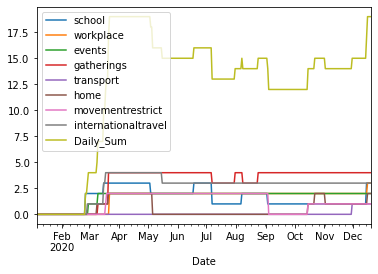

In [19]:
deutch_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

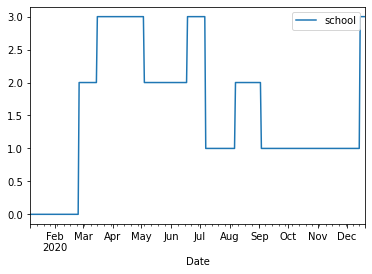

In [20]:
df1 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations Germany


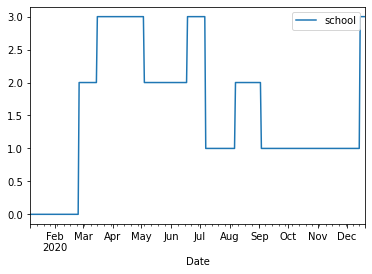

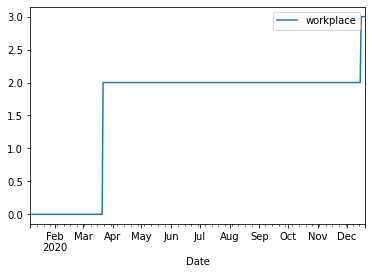

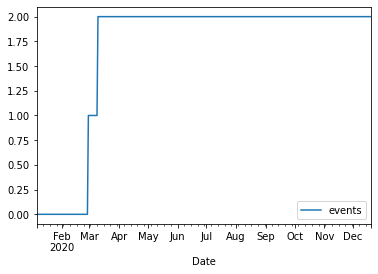

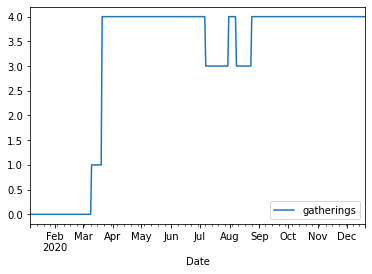

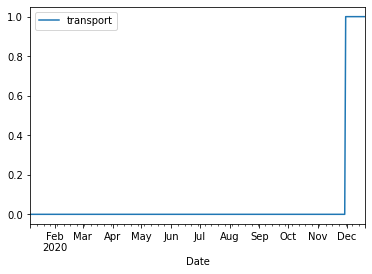

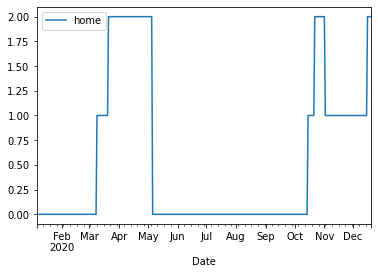

In [21]:
df1 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations Germany")       
plt.show()

In [22]:
#deutch_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [23]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_deutch.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        2.0             9
59        2.0             9
60        3.0             9
61        4.0             9
62        4.0             9
63        4.0            10
64        4.0            10
65        4.0            10
66        4.0            10
67        4.0            10
68        4.0            10
69        4.0            10
70        5.0            11
71        7.0            11
72        7.0            11
73        7.0            11
74        7.0            11
75        7.0            11
76        7.0            11


In [24]:
# 7 days 50 weeks = 350 data points
policy_2020_total_deutch.shape

(350, 2)

## Group the daily sum by week

In [25]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_deutch=policy_2020_total_deutch.groupby(['week_of_year']).sum()
weekly_policy_2020_deutch.columns=["Weekly_sum"] 

In [26]:
weekly_policy_2020_deutch.head(10)

Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                   15.0
10                  28.0
11                  47.0

In [27]:
print(weekly_policy_2020_deutch.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                   15.0
10                  28.0
11                  47.0
12                  94.0
13                 133.0
14                 133.0
15                 133.0
16                 133.0
17                 133.0
18                 133.0
19                 116.0


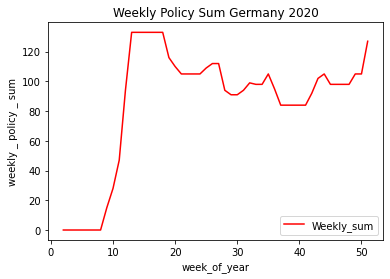

In [28]:
ax = plt.gca()
weekly_policy_2020_deutch.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Germany 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [29]:
#average weekly independent variable 
weekly_policy_2020_deutch=weekly_policy_2020_deutch/7
weekly_policy_2020_deutch.head(10)

Weekly_sum
week_of_year            
2               0.000000
3               0.000000
4               0.000000
5               0.000000
6               0.000000
7               0.000000
8               0.000000
9               2.142857
10              4.000000
11              6.714286

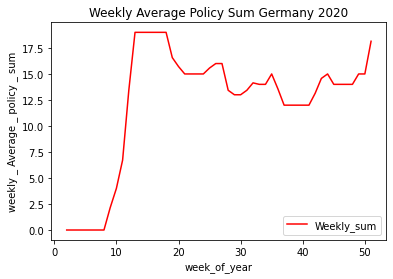

In [30]:
ax = plt.gca()
weekly_policy_2020_deutch.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum Germany 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

In [31]:
#the final independent variable in list form 
weekly_policy_2020_deutch=weekly_policy_2020_deutch['Weekly_sum'].tolist()
print(weekly_policy_2020_deutch[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.142857142857143, 4.0, 6.714285714285714, 13.428571428571429, 19.0, 19.0, 19.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [32]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_deutch.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        0.0     2.0         1.0        0.0   1.0               0.0   
78     3.0        0.0     2.0         1.0        0.0   1.0               0.0   
79     3.0        0.0     2.0         1.0        0.0   1.0               1.0   
80     3.0        0.0     2.0         1.0        0.0   1.0               2.0   
81     3.0        0.0     2.0         1.0        0.0   1.0               2.0   
82     3.0        0.0     2.0         4.0        0.0   2.0               2.0   
83     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
84     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
85     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
86     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
87     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
88     3.0        2.0     2.0         4.

### Let's  drop the transportation as its change is small 

In [33]:
#extract only the two columns of daily_sum and week_of year

policy_2020_indicators_deutch.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_deutch.iloc[70:90,:])


    school  workplace  events  gatherings  home  movementrestrict  \
77     3.0        0.0     2.0         1.0   1.0               0.0   
78     3.0        0.0     2.0         1.0   1.0               0.0   
79     3.0        0.0     2.0         1.0   1.0               1.0   
80     3.0        0.0     2.0         1.0   1.0               2.0   
81     3.0        0.0     2.0         1.0   1.0               2.0   
82     3.0        0.0     2.0         4.0   2.0               2.0   
83     3.0        2.0     2.0         4.0   2.0               2.0   
84     3.0        2.0     2.0         4.0   2.0               2.0   
85     3.0        2.0     2.0         4.0   2.0               2.0   
86     3.0        2.0     2.0         4.0   2.0               2.0   
87     3.0        2.0     2.0         4.0   2.0               2.0   
88     3.0        2.0     2.0         4.0   2.0               2.0   
89     3.0        2.0     2.0         4.0   2.0               2.0   
90     3.0        2.0     2.0     

In [34]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_deutch_indicators=policy_2020_indicators_deutch.groupby(['week_of_year']).sum()
weekly_policy_2020_deutch_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             , "weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_deutch_indicators.iloc[45:50, :])

              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                      7.0              14.0           14.0   
48                      7.0              14.0           14.0   
49                      7.0              14.0           14.0   
50                      7.0              14.0           14.0   
51                     19.0              19.0           14.0   

              weekly_gatherings  weekly_home  weekly_movement  weekly_travel  \
week_of_year                                                                   
47                         28.0          7.0              7.0           21.0   
48                         28.0          7.0              7.0           21.0   
49                         28.0          7.0              7.0           21.0   
50                         28.0          7.0              7.0           21.0   
51                         28.0         12.0              7.0          

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [35]:
#average weekly independent variable 
weekly_policy_2020_deutch_indicators=weekly_policy_2020_deutch_indicators/7
weekly_policy_2020_deutch_indicators.head(10)

weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
2                  0.000000               0.0       0.000000   
3                  0.000000               0.0       0.000000   
4                  0.000000               0.0       0.000000   
5                  0.000000               0.0       0.000000   
6                  0.000000               0.0       0.000000   
7                  0.000000               0.0       0.000000   
8                  0.000000               0.0       0.000000   
9                  1.428571               0.0       0.285714   
10                 2.000000               0.0       1.000000   
11                 2.000000               0.0       1.857143   

              weekly_gatherings  weekly_home  weekly_movement  weekly_travel  \
week_of_year                                                                   
2                      0.000000          0.0              0.0       0.000000   
3                      0.000000          0.0              0.0       0.000000   
4                      0.000000          0.0              0.0       0.000000   
5                      0.000000          0.0              0.0       0.000000   
6                      0.000000          0.0              0.0       0.000000   
7                      0.000000          0.0              0.0       0.000000   
8                      0.000000          0.0              0.0       0.000000   
9                      0.000000          0.0              0.0       0.428571   
10                     0.000000          0.0              0.0       1.000000   
11                     0.857143          1.0              0.0       1.000000   

              weekly_sum  
week_of_year              
2               0.000000  
3               0.000000  
4               0.000000  
5               0.000000  
6               0.000000  
7               0.000000  
8               0.000000  
9               2.142857  
10              4.000000  
11              6.714286

# Part two

## 2.1  Reading in the editorship data


In [36]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [37]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [38]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [39]:
revs_deutch.head()

y  m  d  h     c
0  2018  1  1  0   987
1  2018  1  1  1  1024
2  2018  1  1  2   766
3  2018  1  1  3   681
4  2018  1  1  4   465

In [40]:

#making up the datetime structure 
revs_deutch['dateInt']=revs_deutch['y'].astype(str) + revs_deutch['m'].astype(str).str.zfill(2)+ revs_deutch['d'].astype(str).str.zfill(2)
revs_deutch['Date'] = pd.to_datetime(revs_deutch['dateInt'], format='%Y%m%d')      
revs_deutch = revs_deutch.reset_index()
revs_deutch.head()

index     y  m  d  h     c   dateInt       Date
0      0  2018  1  1  0   987  20180101 2018-01-01
1      1  2018  1  1  1  1024  20180101 2018-01-01
2      2  2018  1  1  2   766  20180101 2018-01-01
3      3  2018  1  1  3   681  20180101 2018-01-01
4      4  2018  1  1  4   465  20180101 2018-01-01

In [41]:
print(revs_deutch.iloc[50:55, :])

    index     y  m  d  h    c   dateInt       Date
50     50  2018  1  3  2  517  20180103 2018-01-03
51     51  2018  1  3  3  520  20180103 2018-01-03
52     52  2018  1  3  4  397  20180103 2018-01-03
53     53  2018  1  3  5  254  20180103 2018-01-03
54     54  2018  1  3  6  476  20180103 2018-01-03


In [42]:

#extract the week number and add it as a new column
revs_deutch['week_of_year']= revs_deutch['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: 24*x.weekday()) + revs_deutch['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_deutch.head(10)

index     y  m  d  h     c   dateInt       Date  week_of_year  hour_of_week
0      0  2018  1  1  0   987  20180101 2018-01-01             1             0
1      1  2018  1  1  1  1024  20180101 2018-01-01             1             1
2      2  2018  1  1  2   766  20180101 2018-01-01             1             2
3      3  2018  1  1  3   681  20180101 2018-01-01             1             3
4      4  2018  1  1  4   465  20180101 2018-01-01             1             4
5      5  2018  1  1  5   294  20180101 2018-01-01             1             5
6      6  2018  1  1  6   263  20180101 2018-01-01             1             6
7      7  2018  1  1  7   300  20180101 2018-01-01             1             7
8      8  2018  1  1  8   590  20180101 2018-01-01             1             8
9      9  2018  1  1  9   965  20180101 2018-01-01             1             9

### 2.2 Prepare editorship data Germany for 2020

In [43]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_deutch_2020=revs_deutch.loc[(revs_deutch['Date'] >= '2020-01-01 00:00:00') & (revs_deutch['Date'] < '2021-01-01 00:00:00')& (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2020.head(10)

index     y  m  d  h     c   dateInt       Date  week_of_year  \
17640  17640  2020  1  6  0   616  20200106 2020-01-06             2   
17641  17641  2020  1  6  1   370  20200106 2020-01-06             2   
17642  17642  2020  1  6  2   305  20200106 2020-01-06             2   
17643  17643  2020  1  6  3   620  20200106 2020-01-06             2   
17644  17644  2020  1  6  4   669  20200106 2020-01-06             2   
17645  17645  2020  1  6  5   633  20200106 2020-01-06             2   
17646  17646  2020  1  6  6   519  20200106 2020-01-06             2   
17647  17647  2020  1  6  7   979  20200106 2020-01-06             2   
17648  17648  2020  1  6  8   860  20200106 2020-01-06             2   
17649  17649  2020  1  6  9  1202  20200106 2020-01-06             2   

       hour_of_week  
17640             0  
17641             1  
17642             2  
17643             3  
17644             4  
17645             5  
17646             6  
17647             7  
17648             8  
17649             9

In [44]:
#tail
revs_deutch_2020.tail(10)

index     y   m   d   h     c   dateInt       Date  week_of_year  \
26030  26030  2020  12  20  14  1597  20201220 2020-12-20            51   
26031  26031  2020  12  20  15  1869  20201220 2020-12-20            51   
26032  26032  2020  12  20  16  1538  20201220 2020-12-20            51   
26033  26033  2020  12  20  17  1873  20201220 2020-12-20            51   
26034  26034  2020  12  20  18  1584  20201220 2020-12-20            51   
26035  26035  2020  12  20  19  1514  20201220 2020-12-20            51   
26036  26036  2020  12  20  20  1372  20201220 2020-12-20            51   
26037  26037  2020  12  20  21  1228  20201220 2020-12-20            51   
26038  26038  2020  12  20  22   942  20201220 2020-12-20            51   
26039  26039  2020  12  20  23   963  20201220 2020-12-20            51   

       hour_of_week  
26030           158  
26031           159  
26032           160  
26033           161  
26034           162  
26035           163  
26036           164  
26037           165  
26038           166  
26039           167

In [45]:

#group by 'week_of_year', 'hour_of_week' 

grouped_deutch_2020=revs_deutch_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_deutch_2020 = grouped_deutch_2020.reset_index()
grouped_deutch_2020.head(10)

week_of_year  hour_of_week  index     y  m  d  h     c
0             2             0  17640  2020  1  6  0   616
1             2             1  17641  2020  1  6  1   370
2             2             2  17642  2020  1  6  2   305
3             2             3  17643  2020  1  6  3   620
4             2             4  17644  2020  1  6  4   669
5             2             5  17645  2020  1  6  5   633
6             2             6  17646  2020  1  6  6   519
7             2             7  17647  2020  1  6  7   979
8             2             8  17648  2020  1  6  8   860
9             2             9  17649  2020  1  6  9  1202

In [46]:
#tail
grouped_deutch_2020.tail(10)

week_of_year  hour_of_week  index     y   m   d   h     c
8390            51           158  26030  2020  12  20  14  1597
8391            51           159  26031  2020  12  20  15  1869
8392            51           160  26032  2020  12  20  16  1538
8393            51           161  26033  2020  12  20  17  1873
8394            51           162  26034  2020  12  20  18  1584
8395            51           163  26035  2020  12  20  19  1514
8396            51           164  26036  2020  12  20  20  1372
8397            51           165  26037  2020  12  20  21  1228
8398            51           166  26038  2020  12  20  22   942
8399            51           167  26039  2020  12  20  23   963

In [47]:

#populate the numpy array 

array_weekly_events_deutch_2020 = np.zeros((52,168))


for  i in range (grouped_deutch_2020.shape[0]):
    
    week=grouped_deutch_2020.iloc[i]['week_of_year']
    hour=grouped_deutch_2020.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2020[week][hour]= grouped_deutch_2020.iloc[i]['c']
    


In [48]:
print(array_weekly_events_deutch_2020)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 616.  370.  305. ... 1276.  939. 1015.]
 ...
 [ 522.  676.  368. ... 1165.  989.  748.]
 [ 516.  650.  448. ... 1075. 1237.  989.]
 [ 532.  662.  661. ... 1228.  942.  963.]]


In [49]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [50]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_deutch_2020=np.sum(array_weekly_events_deutch_2020 , axis=1)
print(weekly_sum_deutch_2020)

[     0.      0. 175960. 176125. 186821. 184773. 185034. 180994. 186485.
 197641. 184617. 178193. 185274. 194772. 204332. 196226. 216421. 203550.
 212990. 190171. 192308. 184851. 177861. 179556. 201572. 178276. 168020.
 172906. 174054. 171909. 176591. 170752. 162886. 170912. 168071. 184426.
 170270. 155431. 157816. 171885. 172133. 168398. 171735. 172835. 179803.
 177330. 183572. 199079. 195787. 187348. 183383. 186243.]


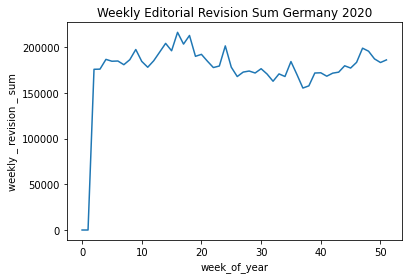

In [51]:
ax = plt.gca()

plt.plot(weekly_sum_deutch_2020) 
plt.title('Weekly Editorial Revision Sum Germany 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [52]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_deutch=np.sum(weekly_sum_deutch_2020)
yearly_sum_2020_deutch

9108378.0

### 2.3  168 daily ratios for 2020 germany

In [53]:

array_weekly_ratios_deutch_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_deutch_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_deutch_2020[i]=array_weekly_events_deutch_2020[i+2]/weekly_sum_deutch_2020[i+2]

print(array_weekly_ratios_deutch_2020)

[[0.0035008  0.00210275 0.00173335 ... 0.00725165 0.00533644 0.00576836]
 [0.00285025 0.00175444 0.00139106 ... 0.00671114 0.00614904 0.00515543]
 [0.00254254 0.00132747 0.00125254 ... 0.00816825 0.00550259 0.00540089]
 ...
 [0.00278626 0.00360826 0.00196426 ... 0.00621837 0.00527895 0.00399257]
 [0.00281378 0.00354449 0.00244297 ... 0.00586205 0.00674545 0.00539308]
 [0.00285648 0.0035545  0.00354913 ... 0.00659354 0.00505791 0.00517066]]


In [54]:
print(array_weekly_ratios_deutch_2020[1][:])

[0.00285025 0.00175444 0.00139106 0.00258907 0.00305465 0.00354862
 0.00594464 0.00572889 0.00612633 0.00553016 0.00643861 0.00658623
 0.00687012 0.00743222 0.00749468 0.00757984 0.00881192 0.00920369
 0.00960114 0.0096352  0.00902768 0.00792619 0.00628531 0.00401419
 0.00325337 0.00244713 0.00133428 0.00355997 0.00323066 0.0035259
 0.00453087 0.00633641 0.00568346 0.00607523 0.00607523 0.00622285
 0.00659759 0.00746061 0.00670546 0.0071824  0.00786941 0.00972605
 0.00749468 0.00778992 0.0100951  0.00872108 0.00532576 0.00449113
 0.00231086 0.00167495 0.00212349 0.00439461 0.00332718 0.00407665
 0.00436622 0.00577999 0.00699503 0.00709723 0.00793187 0.00652945
 0.0067736  0.0075912  0.00838041 0.00802271 0.00790348 0.00899929
 0.01050958 0.00790348 0.0076423  0.00699503 0.00503052 0.00352023
 0.00253797 0.00181689 0.0014308  0.00387225 0.00283322 0.00411639
 0.00389496 0.00638751 0.00669979 0.00715401 0.00663165 0.00550745
 0.00637048 0.0066203  0.0087154  0.00655216 0.00796026 0.00864

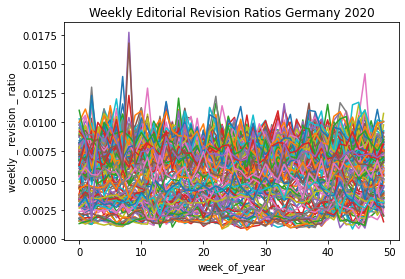

In [55]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020) 
plt.title('Weekly Editorial Revision Ratios Germany 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data Germany for 2019

In [56]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_deutch_2019=revs_deutch.loc[(revs_deutch['Date'] >= '2019-01-01 00:00:00') & (revs_deutch['Date'] < '2020-01-01 00:00:00') & (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2019.head(10)

index     y  m  d  h     c   dateInt       Date  week_of_year  \
8904   8904  2019  1  7  0   755  20190107 2019-01-07             2   
8905   8905  2019  1  7  1   676  20190107 2019-01-07             2   
8906   8906  2019  1  7  2   868  20190107 2019-01-07             2   
8907   8907  2019  1  7  3   753  20190107 2019-01-07             2   
8908   8908  2019  1  7  4   794  20190107 2019-01-07             2   
8909   8909  2019  1  7  5   372  20190107 2019-01-07             2   
8910   8910  2019  1  7  6   519  20190107 2019-01-07             2   
8911   8911  2019  1  7  7   920  20190107 2019-01-07             2   
8912   8912  2019  1  7  8  1119  20190107 2019-01-07             2   
8913   8913  2019  1  7  9  1334  20190107 2019-01-07             2   

      hour_of_week  
8904             0  
8905             1  
8906             2  
8907             3  
8908             4  
8909             5  
8910             6  
8911             7  
8912             8  
8913             9

In [57]:
revs_deutch_2019.tail(10)

index     y   m   d   h     c   dateInt       Date  week_of_year  \
17294  17294  2019  12  22  14  1573  20191222 2019-12-22            51   
17295  17295  2019  12  22  15  1537  20191222 2019-12-22            51   
17296  17296  2019  12  22  16  1393  20191222 2019-12-22            51   
17297  17297  2019  12  22  17  1585  20191222 2019-12-22            51   
17298  17298  2019  12  22  18  1398  20191222 2019-12-22            51   
17299  17299  2019  12  22  19  1238  20191222 2019-12-22            51   
17300  17300  2019  12  22  20  1200  20191222 2019-12-22            51   
17301  17301  2019  12  22  21  1115  20191222 2019-12-22            51   
17302  17302  2019  12  22  22   955  20191222 2019-12-22            51   
17303  17303  2019  12  22  23   922  20191222 2019-12-22            51   

       hour_of_week  
17294           158  
17295           159  
17296           160  
17297           161  
17298           162  
17299           163  
17300           164  
17301           165  
17302           166  
17303           167

In [58]:

grouped_deutch_2019=revs_deutch_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_deutch_2019 = grouped_deutch_2019.reset_index()
grouped_deutch_2019.head(10)

week_of_year  hour_of_week  index     y  m  d  h     c
0             2             0   8904  2019  1  7  0   755
1             2             1   8905  2019  1  7  1   676
2             2             2   8906  2019  1  7  2   868
3             2             3   8907  2019  1  7  3   753
4             2             4   8908  2019  1  7  4   794
5             2             5   8909  2019  1  7  5   372
6             2             6   8910  2019  1  7  6   519
7             2             7   8911  2019  1  7  7   920
8             2             8   8912  2019  1  7  8  1119
9             2             9   8913  2019  1  7  9  1334

In [59]:
grouped_deutch_2019.tail(10)

week_of_year  hour_of_week  index     y   m   d   h     c
8390            51           158  17294  2019  12  22  14  1573
8391            51           159  17295  2019  12  22  15  1537
8392            51           160  17296  2019  12  22  16  1393
8393            51           161  17297  2019  12  22  17  1585
8394            51           162  17298  2019  12  22  18  1398
8395            51           163  17299  2019  12  22  19  1238
8396            51           164  17300  2019  12  22  20  1200
8397            51           165  17301  2019  12  22  21  1115
8398            51           166  17302  2019  12  22  22   955
8399            51           167  17303  2019  12  22  23   922

In [60]:


array_weekly_events_deutch_2019 = np.zeros((52,168))



for  i in range (grouped_deutch_2019.shape[0]):
    
    week=grouped_deutch_2019.iloc[i]['week_of_year']
    hour=grouped_deutch_2019.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2019[week][hour]= grouped_deutch_2019.iloc[i]['c']

print(array_weekly_events_deutch_2019)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 755.  676.  868. ... 1220.  834. 1024.]
 ...
 [ 396.  305.  365. ... 1259.  900.  883.]
 [ 426.  353.  346. ... 1232. 1021.  995.]
 [ 599.  353.  422. ... 1115.  955.  922.]]


In [61]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [62]:
weekly_sum_deutch_2019=np.sum(array_weekly_events_deutch_2019 , axis=1)
print(weekly_sum_deutch_2019)

[     0.      0. 193607. 178849. 194238. 182147. 180296. 176237. 188794.
 180488. 199201. 202202. 174986. 177972. 168785. 174221. 175310. 203676.
 207502. 200327. 199579. 200205. 175434. 169195. 167120. 164316. 164573.
 172203. 183853. 159026. 164046. 171402. 172702. 177445. 178150. 172475.
 174850. 159268. 176457. 184150. 170029. 163678. 165601. 167674. 174043.
 172207. 164424. 174233. 171134. 158792. 159864. 155790.]


In [63]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_deutch=np.sum(weekly_sum_deutch_2019)
yearly_sum_2019_deutch

8842756.0

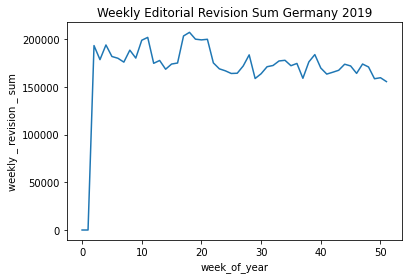

In [64]:
ax = plt.gca()

plt.plot(weekly_sum_deutch_2019) 
plt.title('Weekly Editorial Revision Sum Germany 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

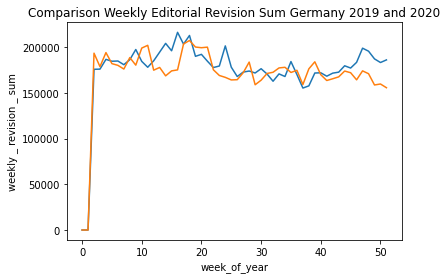

In [65]:
ax = plt.gca()

plt.plot(weekly_sum_deutch_2020) 
plt.plot(weekly_sum_deutch_2019) 
plt.title('Comparison Weekly Editorial Revision Sum Germany 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

### Normalize by weekly sums

In [66]:

array_weekly_ratios_deutch_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_deutch_2019[i]=array_weekly_events_deutch_2019[i+2]/weekly_sum_deutch_2019[i+2]

print(array_weekly_ratios_deutch_2019)

[[0.00389965 0.00349161 0.00448331 ... 0.00630143 0.0043077  0.00528906]
 [0.00387478 0.00333242 0.00433886 ... 0.00829191 0.00542916 0.00498745]
 [0.0023116  0.00284187 0.0041341  ... 0.00761437 0.00891175 0.00862859]
 ...
 [0.00249383 0.00192075 0.0022986  ... 0.00792861 0.00566779 0.00556073]
 [0.00266477 0.00220813 0.00216434 ... 0.00770655 0.00638668 0.00622404]
 [0.00384492 0.00226587 0.00270877 ... 0.00715707 0.00613005 0.00591822]]


In [67]:
print(array_weekly_ratios_deutch_2019[1][:])

[0.00387478 0.00333242 0.00433886 0.00384123 0.00409843 0.00242104
 0.00363994 0.00407606 0.00618399 0.00674312 0.00627345 0.00722397
 0.008236   0.00734698 0.00833664 0.01084714 0.00749235 0.00739171
 0.00767128 0.00873922 0.00847083 0.00683817 0.00596034 0.004501
 0.00300253 0.00399219 0.00369026 0.00228685 0.00290189 0.00201287
 0.00333801 0.00409843 0.00753708 0.0090691  0.00896846 0.00716247
 0.00670957 0.00683817 0.00756504 0.00773278 0.00811299 0.00825836
 0.00720161 0.00702268 0.00853793 0.00716247 0.00577582 0.00422144
 0.00271178 0.00323178 0.00366231 0.00284038 0.00352252 0.00217502
 0.0033436  0.0048868  0.00525024 0.00593797 0.00801794 0.00771601
 0.00708419 0.0072687  0.00693881 0.00708419 0.00809062 0.00717924
 0.0074644  0.00811299 0.00894609 0.00696677 0.00452896 0.0039866
 0.00188427 0.00207438 0.0028963  0.00269501 0.00339392 0.00232039
 0.00352252 0.00465197 0.00516637 0.00656979 0.00596034 0.00722397
 0.00707301 0.00699473 0.00774955 0.00770482 0.00759859 0.0067487

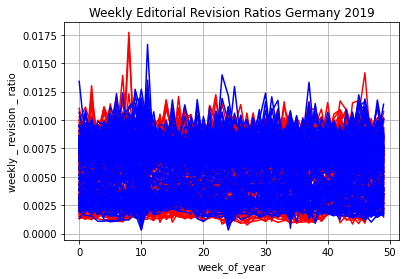

In [68]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020, color='red') 
plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.grid()
plt.show()

# Part three
## 3.1  earthmover and jensenshanon plots

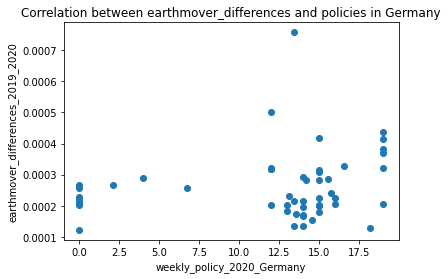

In [69]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))




plt.scatter(weekly_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



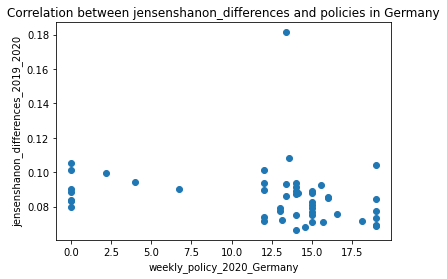

In [70]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    

plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()



### Normalize by yearly sum as well


In [71]:

array_weekly_ratios_deutch_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_deutch_2019_weeklyyearlynorm[i]=array_weekly_events_deutch_2019[i]/yearly_sum_2019_deutch

    
    
    
array_weekly_ratios_deutch_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]=array_weekly_events_deutch_2020[i]/yearly_sum_2020_deutch

print(array_weekly_ratios_deutch_2020_weeklyyearlynorm)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.76300435e-05 4.06219417e-05 3.34856546e-05 ... 1.40090804e-04
  1.03091901e-04 1.11435867e-04]
 ...
 [6.36776383e-05 5.24791571e-05 2.60200005e-05 ... 1.39871226e-04
  1.18242787e-04 9.96884407e-05]
 [5.17106339e-05 2.62395786e-05 3.73282707e-05 ... 1.38004813e-04
  1.32185994e-04 1.06275783e-04]
 [5.73098745e-05 7.42173854e-05 4.04023636e-05 ... 1.27904222e-04
  1.08581352e-04 8.21221956e-05]]


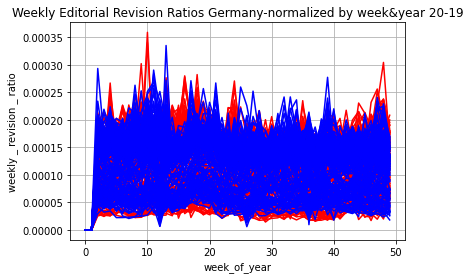

In [72]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_deutch_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


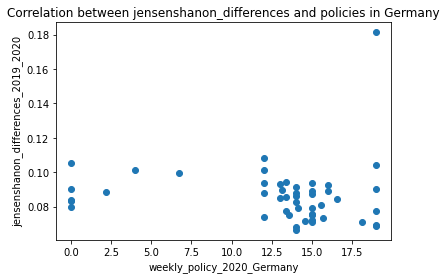

In [73]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()



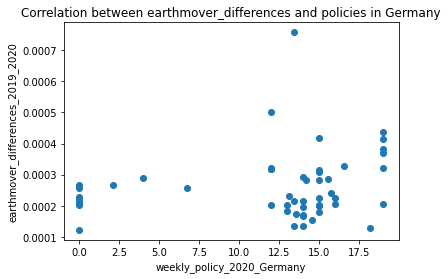

In [74]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))



plt.scatter(weekly_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



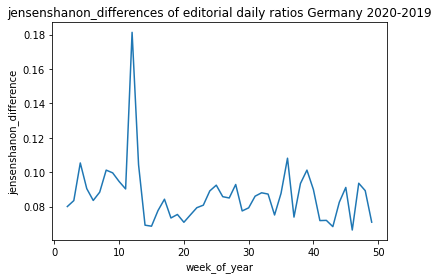

In [75]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

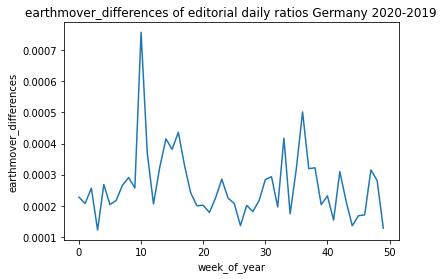

In [76]:
ax = plt.gca()

plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()

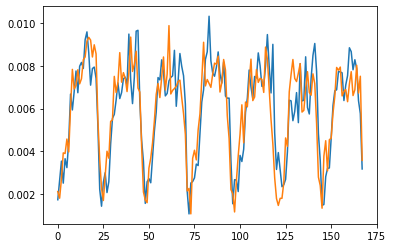

In [77]:
plt.plot(array_weekly_ratios_deutch_2019[20])
plt.plot(array_weekly_ratios_deutch_2020[20])

plt.show()

In [78]:
print(earthmover_differences[20])

0.0002021740386015589


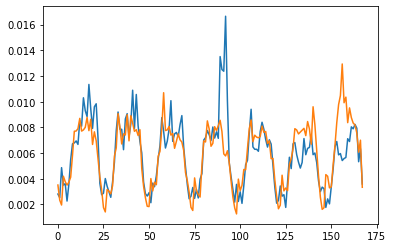

In [79]:
plt.plot(array_weekly_ratios_deutch_2019[11])
plt.plot(array_weekly_ratios_deutch_2020[11])

plt.show()

In [80]:
print(array_weekly_ratios_deutch_2019[11])

[0.00280943 0.00252849 0.00486593 0.00350617 0.00361855 0.0022644
 0.00356236 0.00548401 0.00672016 0.0067932  0.00694491 0.00667521
 0.00851819 0.00809678 0.01030499 0.00930483 0.00883847 0.01134448
 0.00946216 0.00792259 0.00960263 0.00983863 0.00716405 0.0036635
 0.00275324 0.00287686 0.00401749 0.00341627 0.002978   0.00255658
 0.00377026 0.00527611 0.00774841 0.00919808 0.00786079 0.00784955
 0.00626503 0.00865867 0.00906884 0.00724271 0.00827658 0.01089497
 0.00792259 0.01056346 0.00813049 0.00690558 0.00601218 0.00374778
 0.00284314 0.0026521  0.00291619 0.00213517 0.00365788 0.00338255
 0.004231   0.0055121  0.00659092 0.0087598  0.00769222 0.00639426
 0.00692806 0.00786641 0.01008024 0.0069112  0.00749556 0.00760794
 0.00728204 0.00820354 0.00891713 0.00648417 0.00492774 0.00353988
 0.0024442  0.00263525 0.00332075 0.0024723  0.00316904 0.00250601
 0.00397254 0.00439957 0.00701234 0.00720338 0.00775403 0.00742252
 0.00697863 0.00802935 0.00716967 0.00765851 0.00714719 0.013513

## 3.2 Outlier detection & removal  for 2019

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [81]:

# LET'S find the maximum value of the 11th array

print(np.max(array_weekly_ratios_deutch_2019[11]))

0.016654305171600027


In [82]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_deutch_2019[11] == 0.016654305171600027)

(array([92]),)

In [83]:
#get the exact index
print(np.where(array_weekly_ratios_deutch_2019[11] == 0.016654305171600027)[0][0])

92


In [84]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_deutch_2019[11][90:94])

[0.01250197 0.01237273 0.01665431 0.010069  ]


In [85]:

# see  the average of before and after the max element 
array_weekly_ratios_deutch_2019[11][92]=(array_weekly_ratios_deutch_2019[11][90]+array_weekly_ratios_deutch_2019[11][91])/2


print(array_weekly_ratios_deutch_2019[11][90:94])

[0.01250197 0.01237273 0.01243735 0.010069  ]


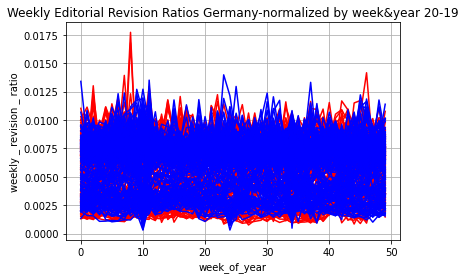

In [86]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020, color='red') 
plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [87]:
array_weekly_ratios_deutch_2019.shape

(50, 168)

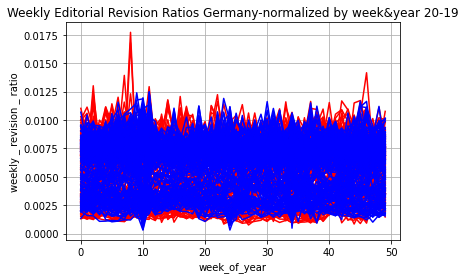

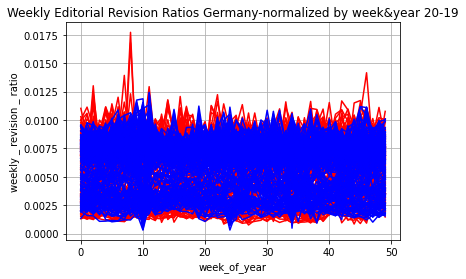

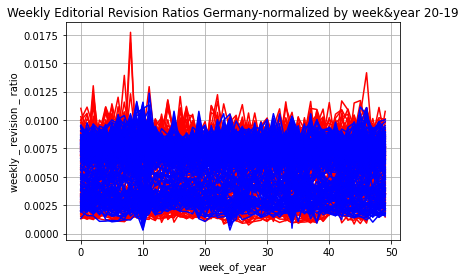

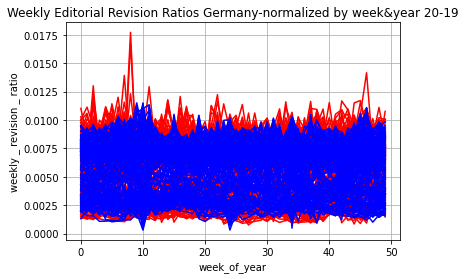

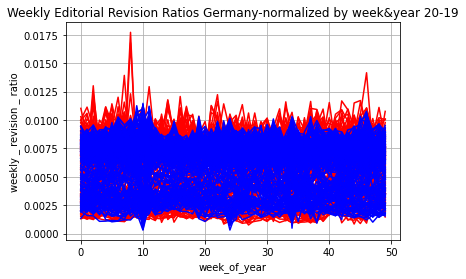

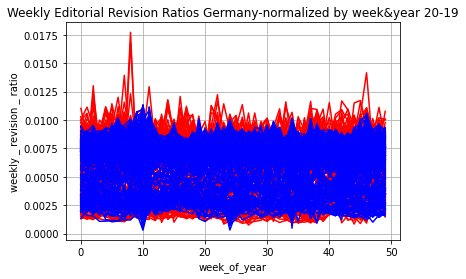

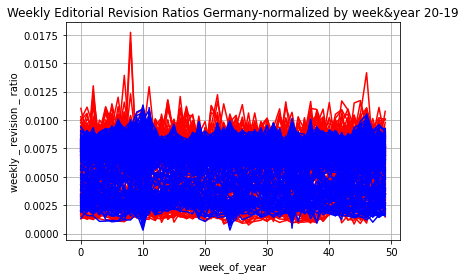

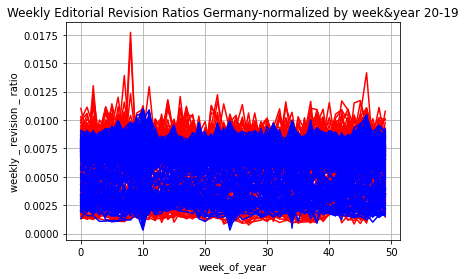

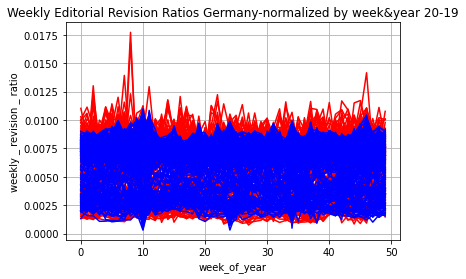

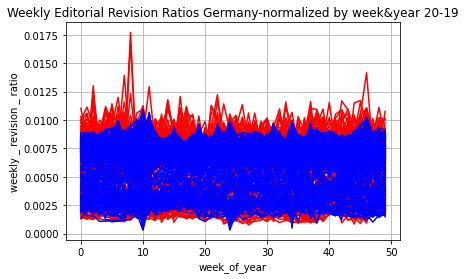

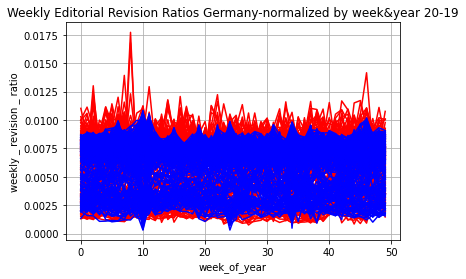

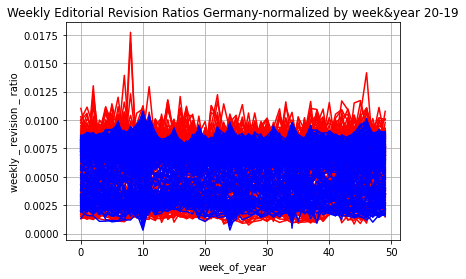

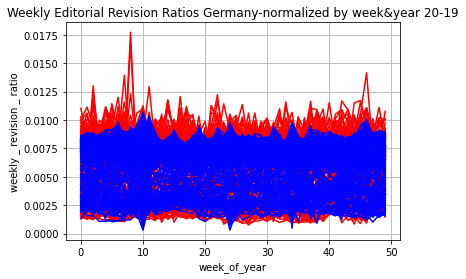

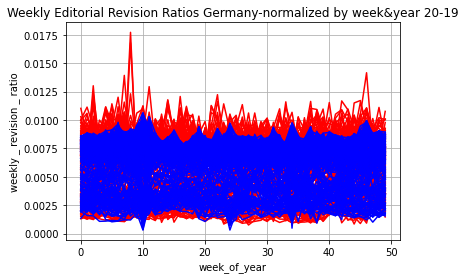

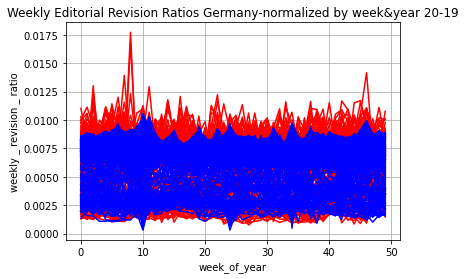

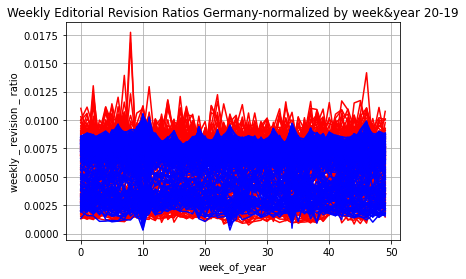

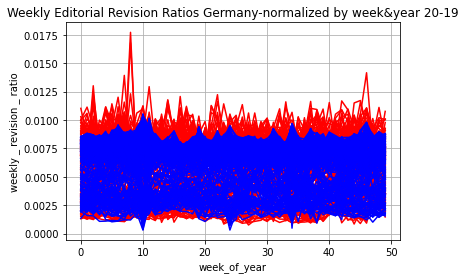

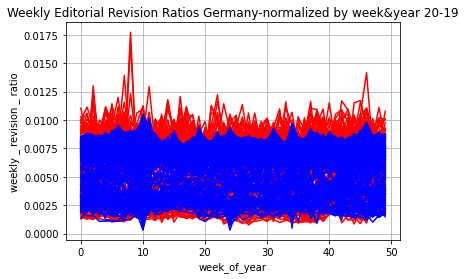

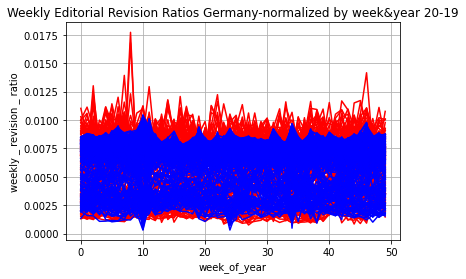

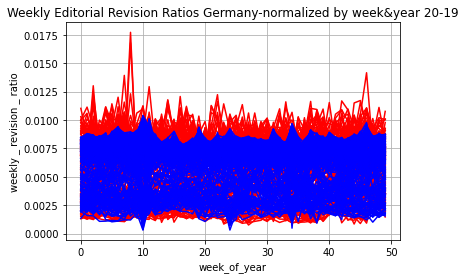

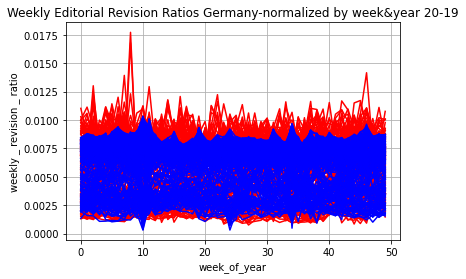

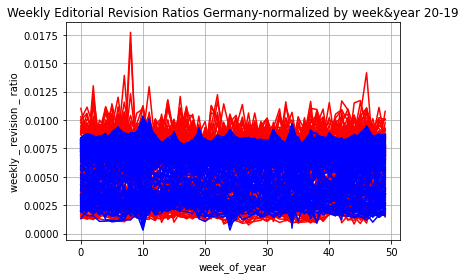

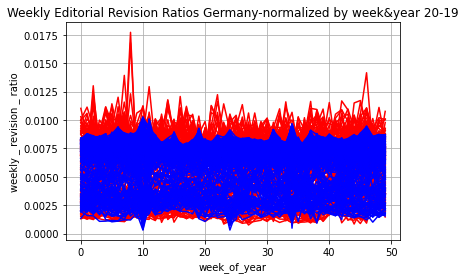

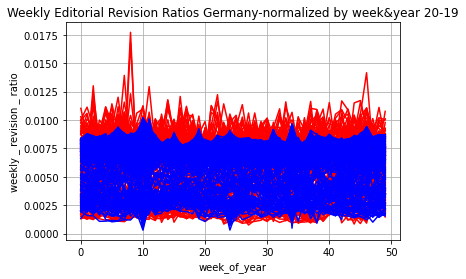

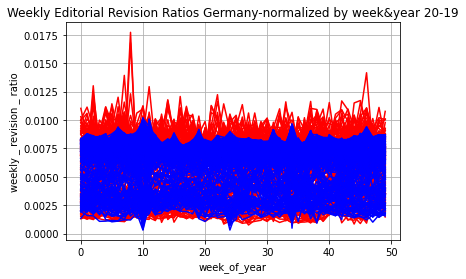

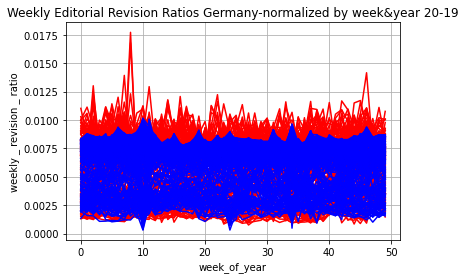

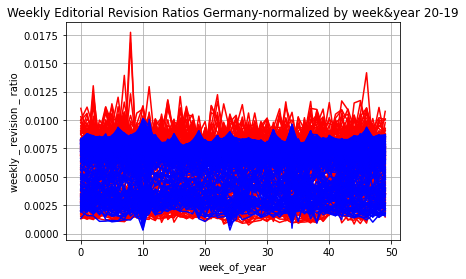

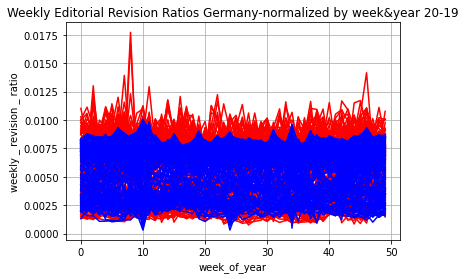

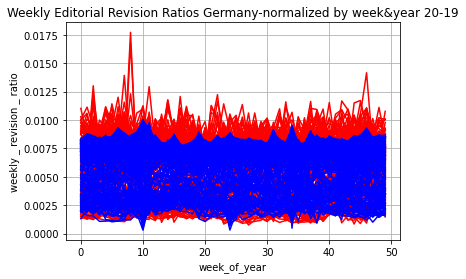

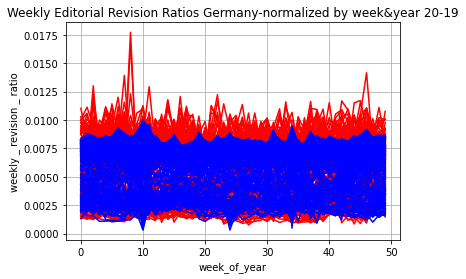

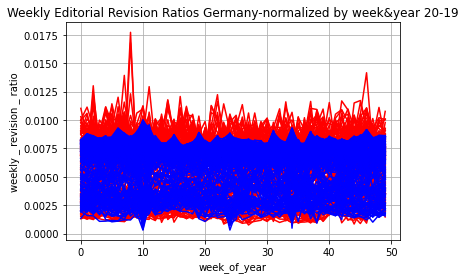

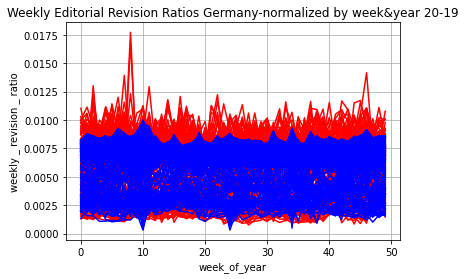

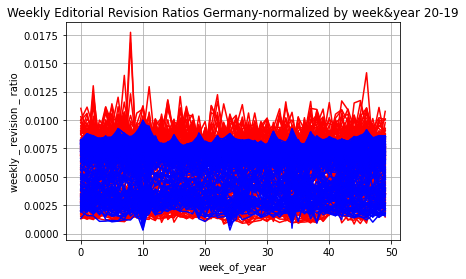

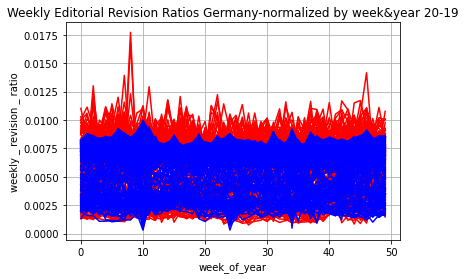

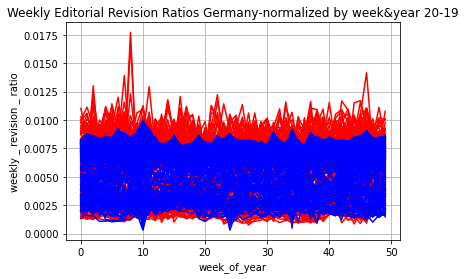

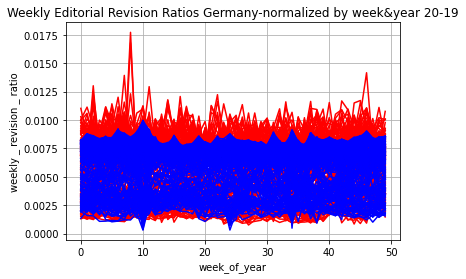

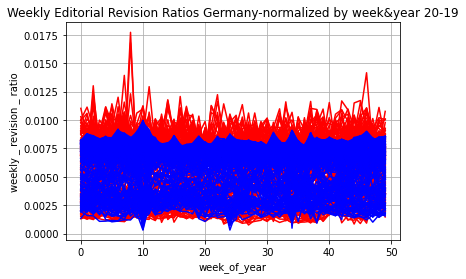

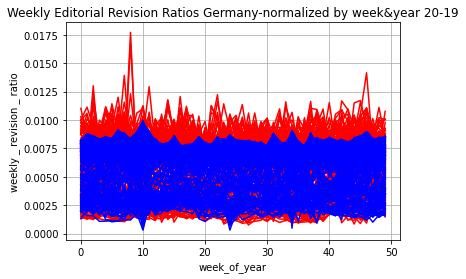

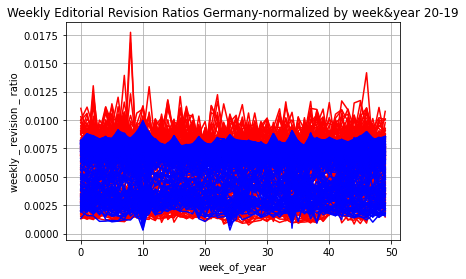

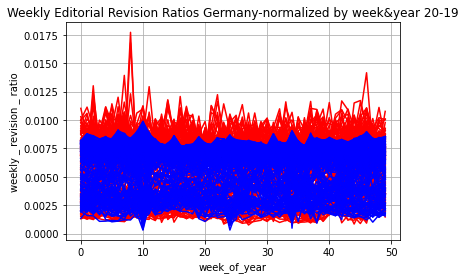

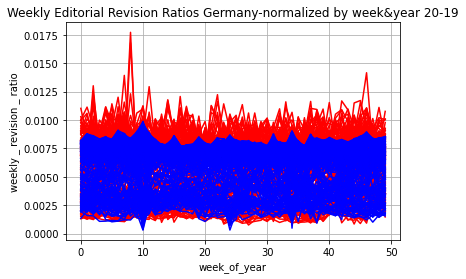

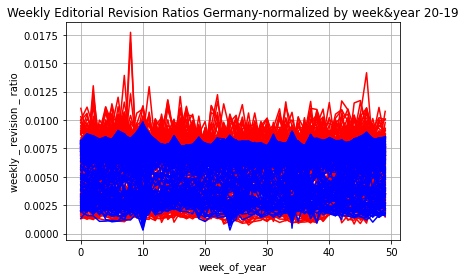

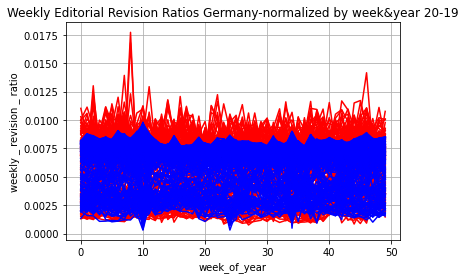

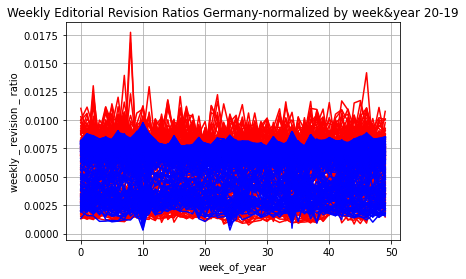

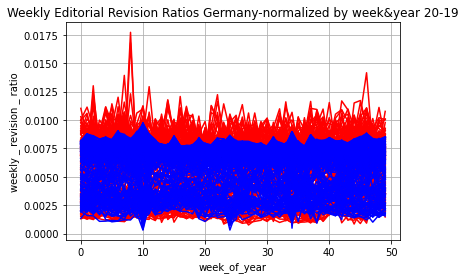

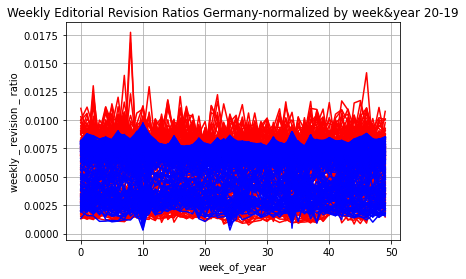

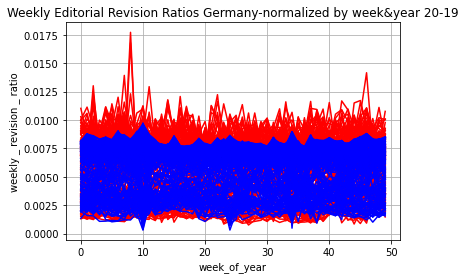

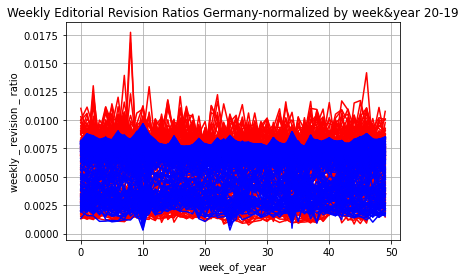

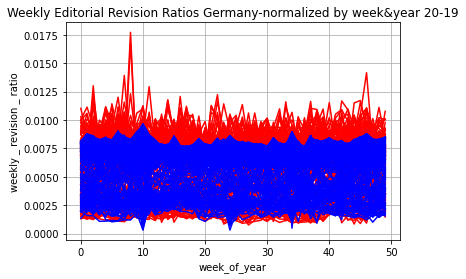

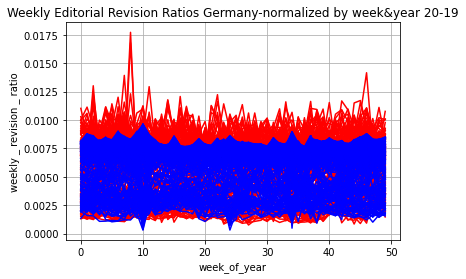

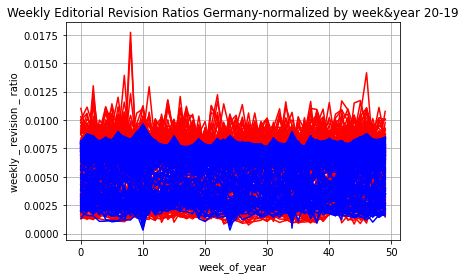

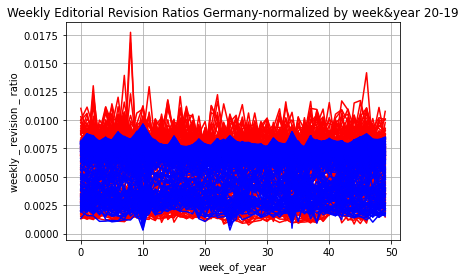

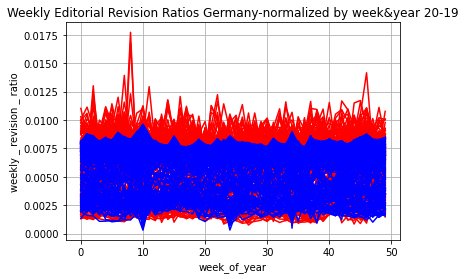

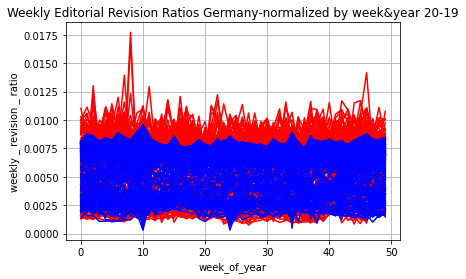

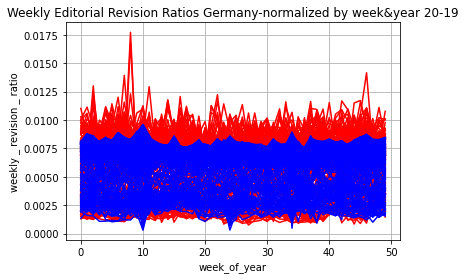

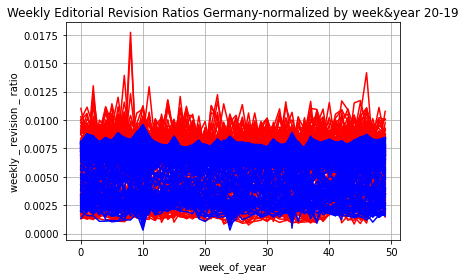

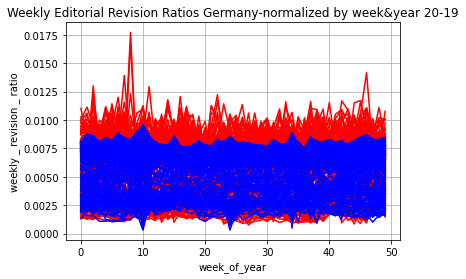

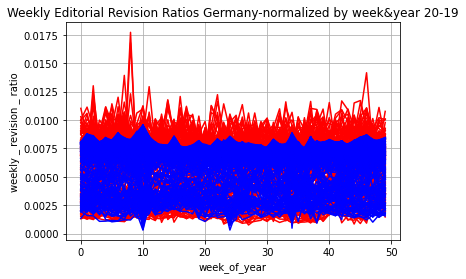

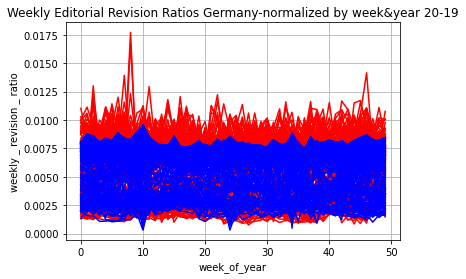

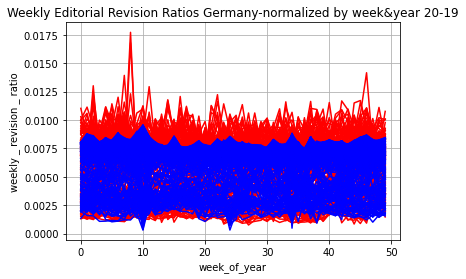

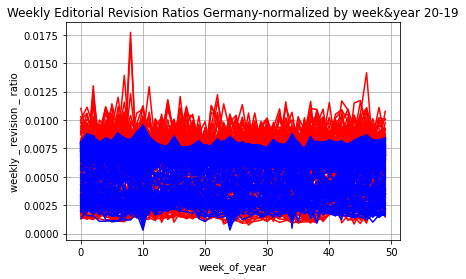

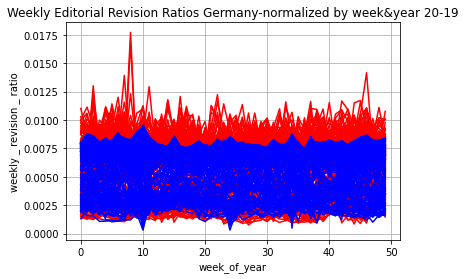

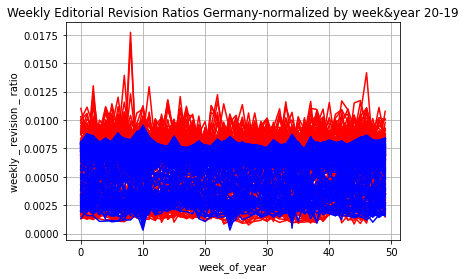

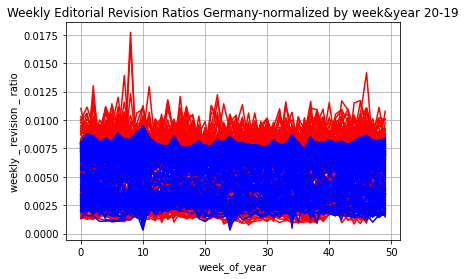

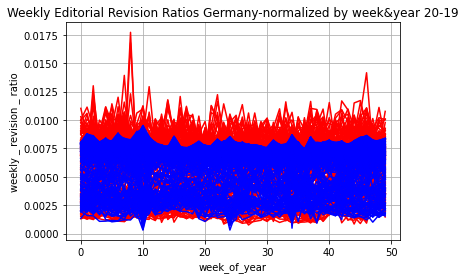

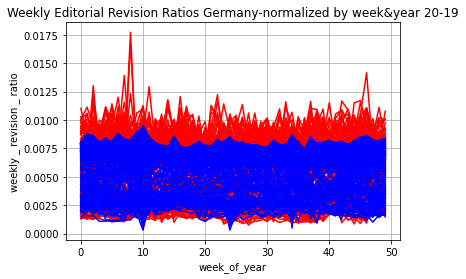

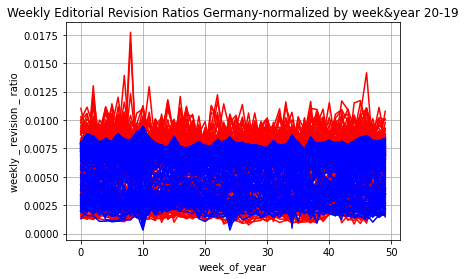

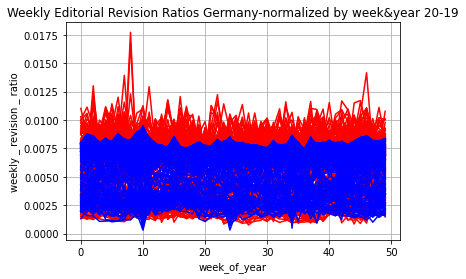

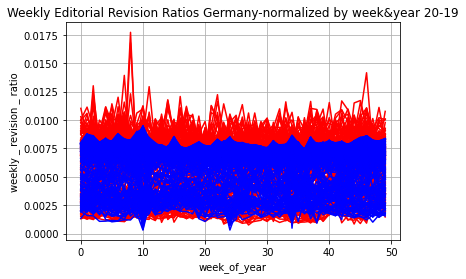

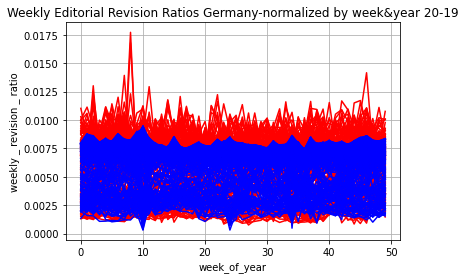

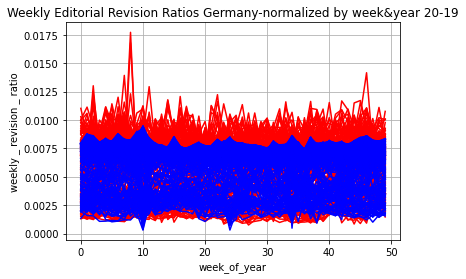

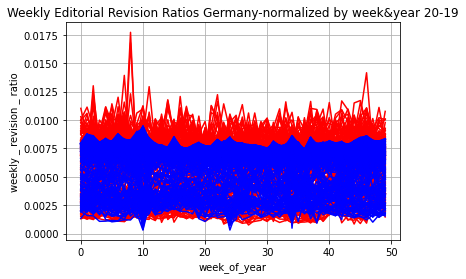

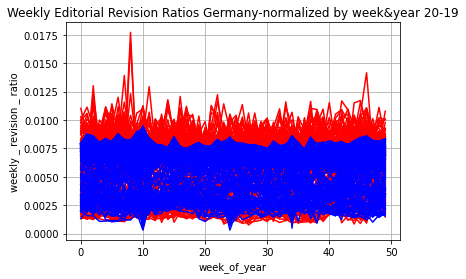

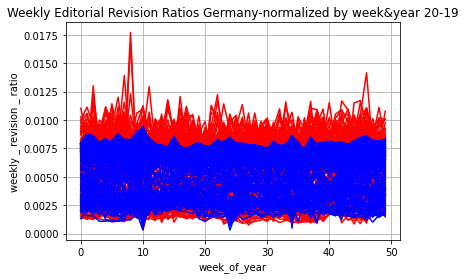

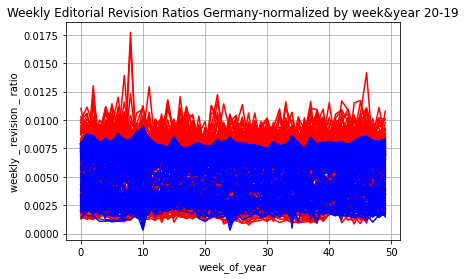

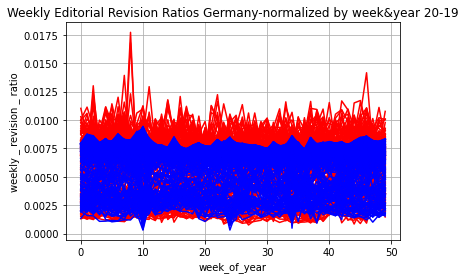

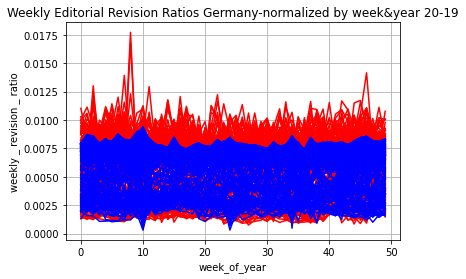

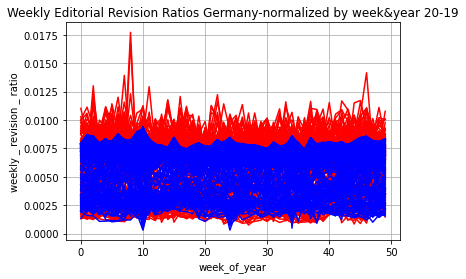

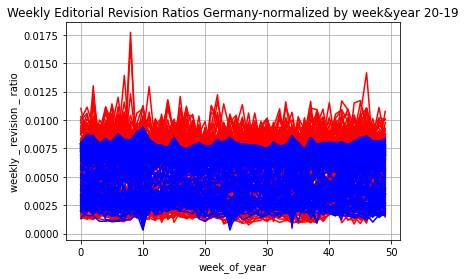

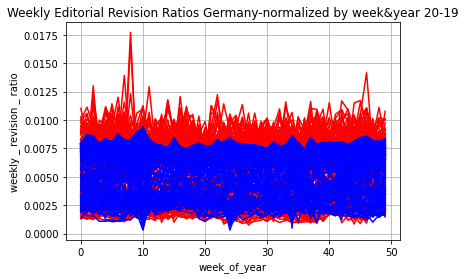

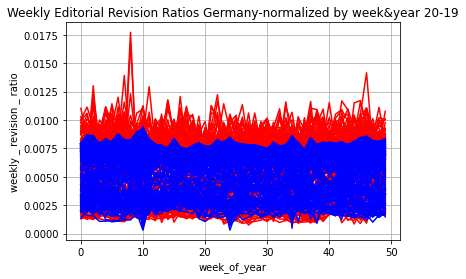

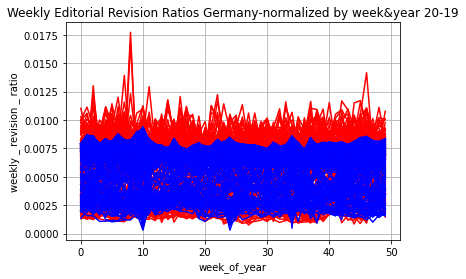

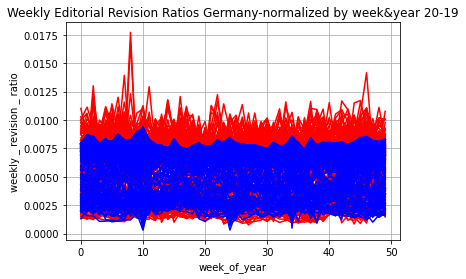

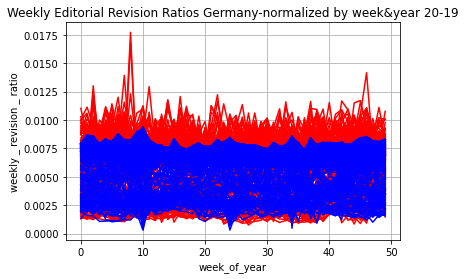

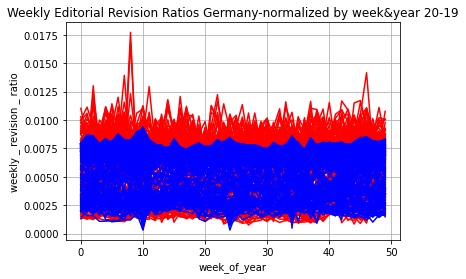

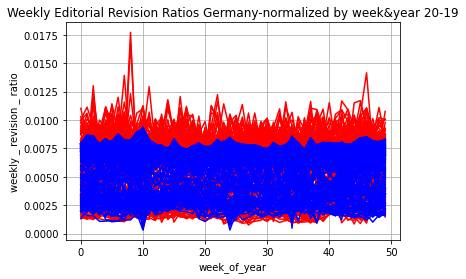

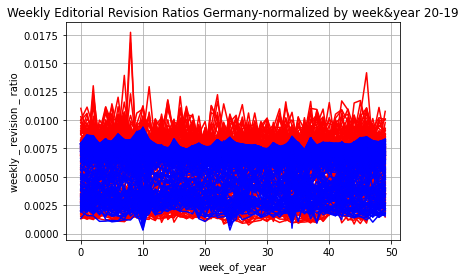

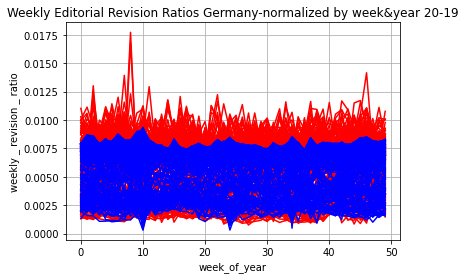

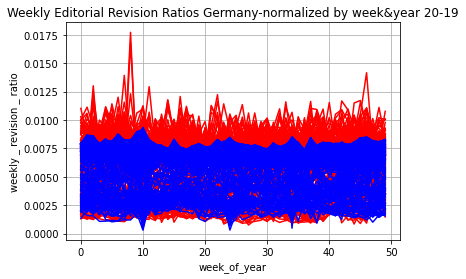

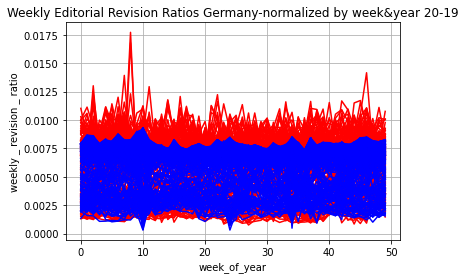

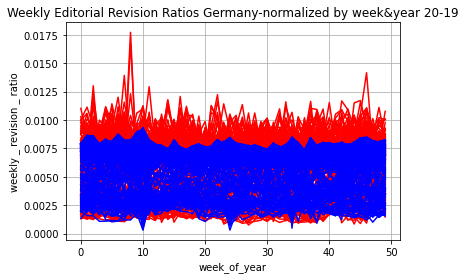

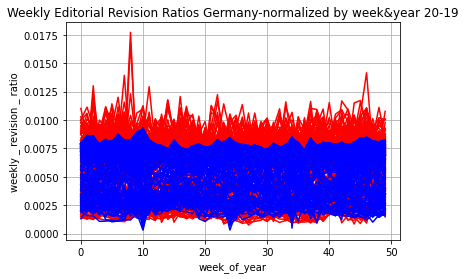

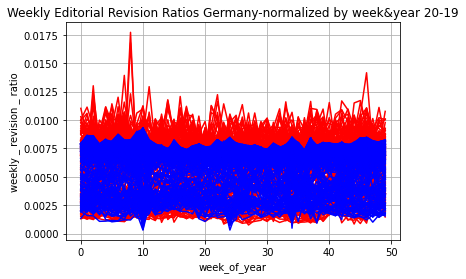

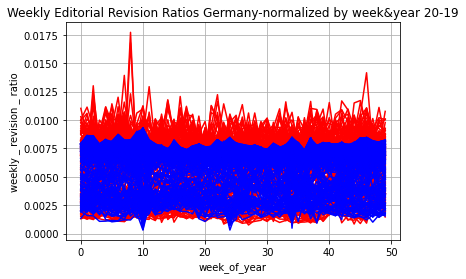

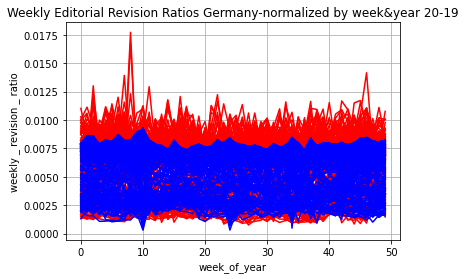

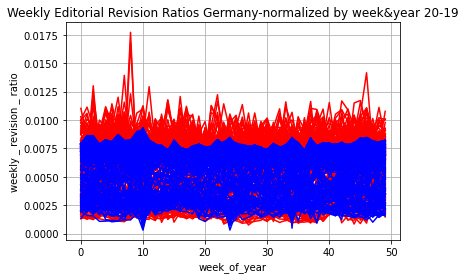

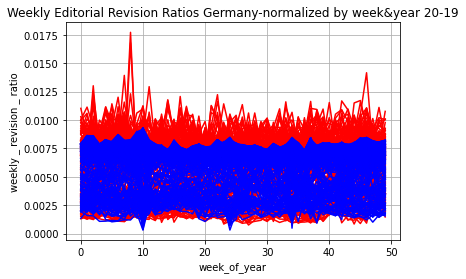

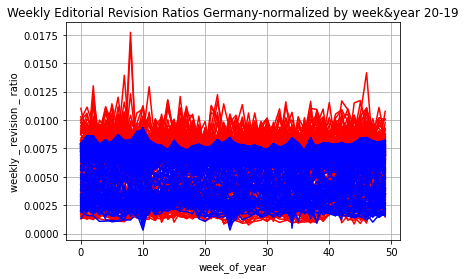

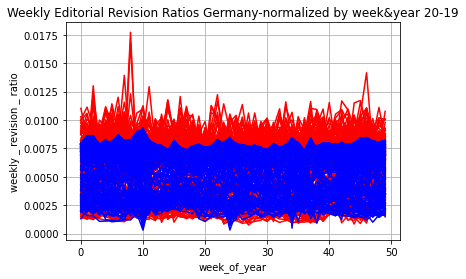

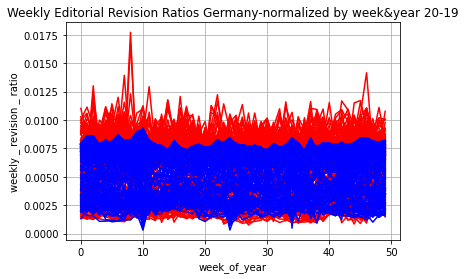

In [88]:
#without_outlier_array_weekly_ratios_deutch_2019=np.zeros((50,168))

for j in range (100): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_deutch_2019[i])
        getindex=np.where(array_weekly_ratios_deutch_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_deutch_2019[i][getindex]=(array_weekly_ratios_deutch_2019[i][getindex-1]+array_weekly_ratios_deutch_2019[i][getindex+1])/2
  
    ax = plt.gca()
    plt.plot(array_weekly_ratios_deutch_2020, color='red') 
    plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
    plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
    plt.ylabel('weekly _ revision _ ratio')
    plt.grid()
    plt.xlabel('week_of_year')
    plt.show()  

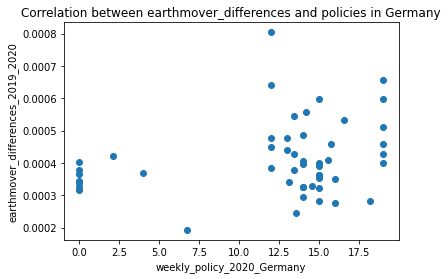

correlation and p_value are:  0.2512226478024838 0.07843729459269527


In [89]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))




plt.scatter(weekly_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

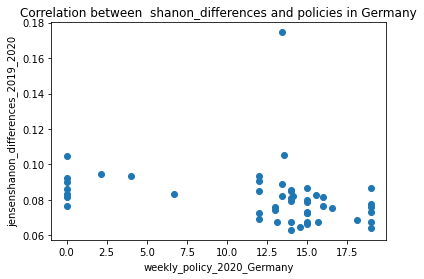

correlation and p_value are:  -0.279788986478934 0.04908356441110778


In [90]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    
plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

In [91]:
print(jensenshanon_differences)

[0.07641708724652232, 0.08157070314927514, 0.10477499736954644, 0.09018931288577753, 0.08342376903856036, 0.08617480725235165, 0.09254083104157532, 0.09471820328161382, 0.0936309277987333, 0.08318730163784464, 0.1745514886912389, 0.08640716707047093, 0.06414586164694919, 0.06724784695224093, 0.0759448003680282, 0.0773802435377378, 0.07336086934708523, 0.07523810318397604, 0.06748509850450254, 0.06637356768946746, 0.07234818396634252, 0.07304229456063108, 0.07879849579957741, 0.08266250654852042, 0.08173784080777502, 0.07626227599570996, 0.08884030476436022, 0.07398320157778053, 0.07569464369198013, 0.08228453907267101, 0.08229549471247431, 0.07916606728482876, 0.0672601767515655, 0.08666882273231215, 0.1054267993359205, 0.07233294886066963, 0.0934902438846989, 0.09035514656531443, 0.08489892338590789, 0.06898216903406777, 0.06727371526450276, 0.06467980138321912, 0.08015821880815618, 0.08531148898653178, 0.06294543762089558, 0.0851851223632504, 0.08096962660249446, 0.06747006382874149,

In [92]:
new=[0.8171406622643868, 0.8175805646810089,0.8171406622643868, 0.8175805646810089,0.8171406622643868, 0.8175805646810089,0.8155955652722686, 0.8213390162542141, 0.8182390593485905, 0.8186739065656239, 0.8189635418516507, 0.8201543260735763, 0.8198499484580878, 0.8158458491944066, 0.8123327194412738, 0.8196513602628978, 0.820091124911057, 0.821806557531096, 0.8186461170061098, 0.8196086018864014, 0.8198704614781582, 0.8181590070955161, 0.819331942663974, 0.8176932097566284, 0.8171951447712539, 0.8221447913241161, 0.8196990022486732, 0.8137407638019303, 0.8204560407485867, 0.8184340870706893, 0.8185398936010881, 0.8194950440200762, 0.815157780182194, 0.8211618786290201, 0.8197924419314915, 0.8189629870987053, 0.819996153538264, 0.8183920678826423, 0.8171153907759791, 0.818619902565747, 0.8182867949635153, 0.8201054828646287, 0.8207098154263853, 0.819921532615816, 0.8185793033378961, 0.8184344637774007, 0.8182340836411686, 0.818446987621568, 0.8217414690546463, 0.8175441783850881]

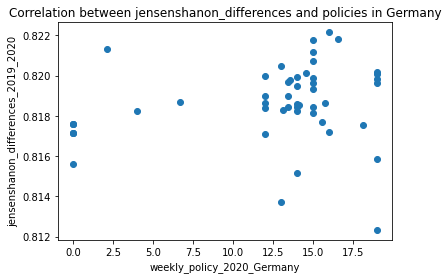

correlation and p_value are:  0.21349122421118472 0.13657919869341642


In [93]:
plt.scatter(  weekly_policy_2020_deutch, new) 

#plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(new, weekly_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)



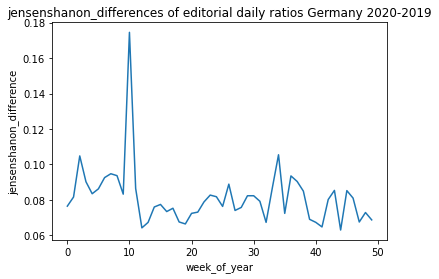

In [94]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

In [95]:
print(len(array_weekly_events_deutch_2019[2:]))

50


## 3.3 Moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

In [96]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_deutch_2019_50=array_weekly_events_deutch_2019[2:]

moving_average_weekly_ratios_deutch_2019=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_deutch_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_deutch_2019_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_deutch_2019[i]= np.asarray(moving_averages)

        

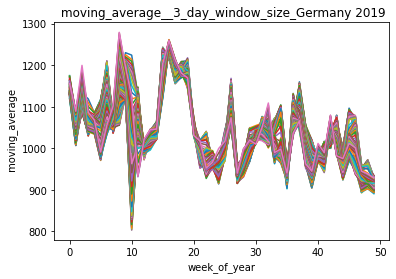

In [97]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2019) 
plt.title(' moving_average__3_day_window_size_Germany 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

In [98]:

array_weekly_events_deutch_2020_50=array_weekly_events_deutch_2020[2:]

moving_average_weekly_ratios_deutch_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_deutch_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_deutch_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_deutch_2020[i]= np.asarray(moving_averages)

        

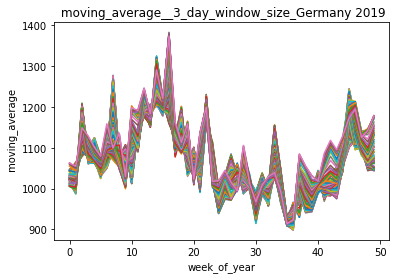

In [99]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2020) 
plt.title(' moving_average__3_day_window_size_Germany 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

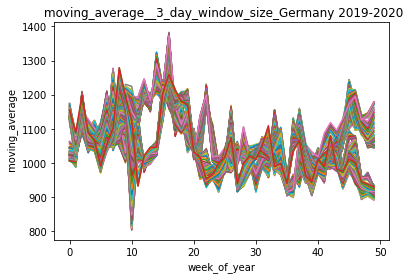

In [100]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2020) 
plt.plot( moving_average_weekly_ratios_deutch_2019) 

plt.title(' moving_average__3_day_window_size_Germany 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

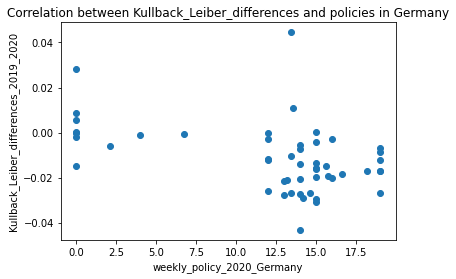

In [101]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    

plt.scatter(weekly_policy_2020_deutch, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()





## 3.5 Feature importance - feature selection - dimensionality reduction
Which policy indicators have the highest correlation with the editorial data?
Let's first look at correlations

In [102]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_deutch_indicators
edit_and_policy['jensenshanon_differences']=jensenshanon_differences
edit_and_policy['earthmover_differences']=earthmover_differences


edit_and_policy.head(10)


weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
2                  0.000000               0.0       0.000000   
3                  0.000000               0.0       0.000000   
4                  0.000000               0.0       0.000000   
5                  0.000000               0.0       0.000000   
6                  0.000000               0.0       0.000000   
7                  0.000000               0.0       0.000000   
8                  0.000000               0.0       0.000000   
9                  1.428571               0.0       0.285714   
10                 2.000000               0.0       1.000000   
11                 2.000000               0.0       1.857143   

              weekly_gatherings  weekly_home  weekly_movement  weekly_travel  \
week_of_year                                                                   
2                      0.000000          0.0              0.0       0.000000   
3                      0.000000          0.0              0.0       0.000000   
4                      0.000000          0.0              0.0       0.000000   
5                      0.000000          0.0              0.0       0.000000   
6                      0.000000          0.0              0.0       0.000000   
7                      0.000000          0.0              0.0       0.000000   
8                      0.000000          0.0              0.0       0.000000   
9                      0.000000          0.0              0.0       0.428571   
10                     0.000000          0.0              0.0       1.000000   
11                     0.857143          1.0              0.0       1.000000   

              weekly_sum  jensenshanon_differences  earthmover_differences  
week_of_year                                                                
2               0.000000                  0.076417                0.000364  
3               0.000000                  0.081571                0.000315  
4               0.000000                  0.104775                0.000338  
5               0.000000                  0.090189                0.000325  
6               0.000000                  0.083424                0.000403  
7               0.000000                  0.086175                0.000379  
8               0.000000                  0.092541                0.000345  
9               2.142857                  0.094718                0.000422  
10              4.000000                  0.093631                0.000370  
11              6.714286                  0.083187                0.000192

## 3.5.1  Correlation Heatmap

In [103]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


In [104]:

#1
df2_meaned=weekly_policy_2020_deutch_indicators.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

weekly_school  weekly_workplace  weekly_events  \
weekly_school                  0.930912          0.371812       0.432187   
weekly_workplace               0.371812          0.706714       0.543557   
weekly_events                  0.432187          0.543557       0.536243   
weekly_gatherings              0.770112          1.269779       1.050212   
weekly_home                    0.341474          0.168172       0.180891   
weekly_movement                0.575360          0.466739       0.399067   
weekly_travel                  0.843332          0.936293       0.862041   
weekly_sum                     4.267289          4.503357       4.024840   
jensenshanon_differences      -0.000168         -0.006437      -0.002592   
earthmover_differences         0.000022          0.000021       0.000018   

                          weekly_gatherings  weekly_home  weekly_movement  \
weekly_school                      0.770112     0.341474         0.575360   
weekly_workplace                   1.269779     0.168172         0.466739   
weekly_events                      1.050212     0.180891         0.399067   
weekly_gatherings                  2.437393     0.392112         0.823190   
weekly_home                        0.392112     0.580433         0.151420   
weekly_movement                    0.823190     0.151420         0.755219   
weekly_travel                      1.817276     0.443215         0.786789   
weekly_sum                         8.617626     2.300808         3.947988   
jensenshanon_differences          -0.009577    -0.001233        -0.003197   
earthmover_differences             0.000041     0.000007         0.000015   

                          weekly_travel  weekly_sum  jensenshanon_differences  \
weekly_school                  0.843332    4.267289             -1.677904e-04   
weekly_workplace               0.936293    4.503357             -6.436847e-03   
weekly_events                  0.862041    4.024840             -2.591674e-03   
weekly_gatherings              1.817276    8.617626             -9.577069e-03   
weekly_home                    0.443215    2.300808             -1.233459e-03   
weekly_movement                0.786789    3.947988             -3.196729e-03   
weekly_travel                  1.598034    7.310421             -3.936223e-03   
weekly_sum                     7.310421   35.207197             -2.785532e-02   
jensenshanon_differences      -0.003936   -0.027855              2.815293e-04   
earthmover_differences         0.000052    0.000171              2.965253e-07   

                          earthmover_differences  
weekly_school                       2.156041e-05  
weekly_workplace                    2.067669e-05  
weekly_events                       1.812087e-05  
weekly_gatherings                   4.111000e-05  
weekly_home                         6.762739e-06  
weekly_movement                     1.502014e-05  
weekly_travel                       5.239604e-05  
weekly_sum                          1.707474e-04  
jensenshanon_differences            2.965253e-07  
earthmover_differences              1.312076e-08

In [105]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
eig_vectors

array([[-1.11395018e-01,  5.94288537e-01, -2.26748717e-01,
         5.97204816e-01,  2.92370845e-01,  1.51763327e-01,
         1.41458302e-02,  3.42864482e-01,  8.64486354e-03,
        -5.28422004e-05],
       [-1.19166166e-01, -3.30826892e-01, -5.51034857e-02,
        -1.10453772e-01,  2.98693096e-01, -8.07570486e-02,
        -7.16595175e-01,  5.00245212e-01,  4.02910027e-02,
        -1.18736260e-04],
       [-1.06296356e-01, -1.42644507e-01, -3.06964009e-02,
         2.54798626e-01, -3.71263369e-01, -7.45855590e-01,
         2.44978797e-01,  3.85128591e-01,  3.64930579e-03,
         1.00540112e-04],
       [-2.28068954e-01, -5.58381138e-01,  7.20235611e-02,
         1.21859950e-01,  3.44249328e-01,  3.29415692e-01,
         5.64061425e-01,  2.66308502e-01,  7.07172441e-03,
         1.39884634e-05],
       [-5.93863155e-02,  3.77299764e-01,  7.59377414e-01,
        -3.43376695e-01,  5.55995981e-02, -6.28270854e-03,
         1.18196840e-01,  3.77167664e-01,  1.41355837e-02,
        -1.

In [106]:
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [107]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


          PC1       PC2
0   13.206124  0.174736
1   13.206127  0.174761
2   13.206144  0.174876
3   13.206134  0.174804
4   13.206129  0.174771
5   13.206131  0.174784
6   13.206135  0.174816
7   10.948367  1.145727
8    8.977739  1.512011
9    6.116587  1.528083
10  -1.167141  2.273007
11  -7.194405  1.414370
12  -7.194421  1.414260
13  -7.194419  1.414275
14  -7.194412  1.414318
15  -7.194411  1.414325
16  -7.194414  1.414305
17  -4.747775  0.066555
18  -3.864510 -0.207067
19  -3.064940 -0.225875
20  -3.064936 -0.225845
21  -3.064936 -0.225842
22  -3.064931 -0.225813
23  -3.658090  0.164263
24  -4.102962  0.456801
25  -4.102966  0.456774
26  -1.333724 -0.310418
27  -0.872196 -0.438368
28  -0.872195 -0.438359
29  -1.367064 -0.639785
30  -2.141851 -0.481548
31  -1.910225  0.244258
32  -1.910233  0.244199
33  -3.064925 -0.225774
34  -1.588681 -0.885415
35   0.033591 -1.537691
36   0.033606 -1.537586
37   0.033604 -1.537601
38   0.033600 -1.537628
39   0.033588 -1.537707
40  -1.118568 -1

In [108]:
principal_df2_two_dim.var()

PC1    40.991674
PC2     0.878666
dtype: float64

In [109]:
PC1=list(principal_df2_two_dim.iloc[:,0])

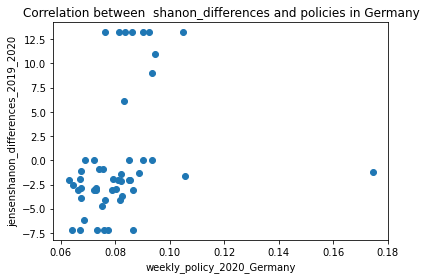

correlation and p_value are:  0.28131599659995477 0.04780928083841192


In [110]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

# Poland
## 1. prepare the policy data for Poland 

In [111]:

poland_policy_transposed =poland_policy.T 
poland_policy_transposed.reset_index(inplace=True)

poland_policy_transposed = poland_policy_transposed.drop(labels=0, axis=0)
poland_policy_transposed.rename(columns=poland_policy_transposed.iloc[0])
poland_policy_transposed.head()



index       0       1       2       3       4       5       6  \
1  country_name  Poland  Poland  Poland  Poland  Poland  Poland  Poland   
2     01Jan2020       0       0       0       0       0       0       0   
3     02Jan2020       0       0       0       0       0       0       0   
4     03Jan2020       0       0       0       0       0       0       0   
5     04Jan2020       0       0       0       0       0       0       0   

        7                                         Daily_Sum  
1  Poland  PolandPolandPolandPolandPolandPolandPolandPoland  
2       0                                                 0  
3       0                                                 0  
4       0                                                 0  
5       0                                                 0

In [112]:
#drop the first row
poland_policy_transposed=poland_policy_transposed.iloc[1:,:]
poland_policy_transposed.head()

index  0  1  2  3  4  5  6  7 Daily_Sum
2  01Jan2020  0  0  0  0  0  0  0  0         0
3  02Jan2020  0  0  0  0  0  0  0  0         0
4  03Jan2020  0  0  0  0  0  0  0  0         0
5  04Jan2020  0  0  0  0  0  0  0  0         0
6  05Jan2020  0  0  0  0  0  0  0  0         0

In [113]:
print(poland_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  0         0
64  03Mar2020  0  0  0  0  0  0  0  0         0
65  04Mar2020  0  0  0  0  0  0  0  0         0
66  05Mar2020  0  0  0  0  0  0  0  0         0


In [114]:

# rename the "index column" to "Date" and change it from string to datetime

poland_policy_transposed.columns
poland_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']
poland_policy_transposed['Date']=pd.to_datetime(poland_policy_transposed['Date'])

poland_policy_transposed.head()


Date  0  1  2  3  4  5  6  7 Daily_Sum
2 2020-01-01  0  0  0  0  0  0  0  0         0
3 2020-01-02  0  0  0  0  0  0  0  0         0
4 2020-01-03  0  0  0  0  0  0  0  0         0
5 2020-01-04  0  0  0  0  0  0  0  0         0
6 2020-01-05  0  0  0  0  0  0  0  0         0

In [115]:


#extract the week number (of the year) and add it as a new column

poland_policy_transposed['week_of_year']= poland_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
poland_policy_transposed.head(10)


Date  0  1  2  3  4  5  6  7 Daily_Sum  week_of_year
2  2020-01-01  0  0  0  0  0  0  0  0         0             1
3  2020-01-02  0  0  0  0  0  0  0  0         0             1
4  2020-01-03  0  0  0  0  0  0  0  0         0             1
5  2020-01-04  0  0  0  0  0  0  0  0         0             1
6  2020-01-05  0  0  0  0  0  0  0  0         0             1
7  2020-01-06  0  0  0  0  0  0  0  0         0             2
8  2020-01-07  0  0  0  0  0  0  0  0         0             2
9  2020-01-08  0  0  0  0  0  0  0  0         0             2
10 2020-01-09  0  0  0  0  0  0  0  0         0             2
11 2020-01-10  0  0  0  0  0  0  0  0         0             2

In [116]:

# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

poland_policy_transposed_FirstLastWeekDropped=poland_policy_transposed.loc[( (poland_policy_transposed['Date'] < '2021-01-01 00:00:00') & (poland_policy_transposed['week_of_year']< 52) & (1<poland_policy_transposed['week_of_year']))]



In [117]:

#head
poland_policy_transposed_FirstLastWeekDropped.head()


Date  0  1  2  3  4  5  6  7 Daily_Sum  week_of_year
7  2020-01-06  0  0  0  0  0  0  0  0         0             2
8  2020-01-07  0  0  0  0  0  0  0  0         0             2
9  2020-01-08  0  0  0  0  0  0  0  0         0             2
10 2020-01-09  0  0  0  0  0  0  0  0         0             2
11 2020-01-10  0  0  0  0  0  0  0  0         0             2

In [118]:

#tail
poland_policy_transposed_FirstLastWeekDropped.tail()


Date  0  1  2  3  4  5  6  7 Daily_Sum  week_of_year
352 2020-12-16  3  2  2  4  1  1  1  3        17            51
353 2020-12-17  3  2  2  4  1  1  1  3        17            51
354 2020-12-18  3  2  2  4  1  1  1  3        17            51
355 2020-12-19  3  2  2  4  1  1  1  3        17            51
356 2020-12-20  3  2  2  4  1  1  1  3        17            51

In [119]:

#extract only the two columns of daily_sum and week_of year
policy_2020_total_poland=poland_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
policy_2020_total_poland.head(10)


Daily_Sum  week_of_year
7          0             2
8          0             2
9          0             2
10         0             2
11         0             2
12         0             2
13         0             2
14         0             3
15         0             3
16         0             3

In [120]:

#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_poland=policy_2020_total_poland.groupby(['week_of_year']).sum()

print(weekly_policy_2020_poland.iloc[:18, :])


              Daily_Sum
week_of_year           
2                   0.0
3                   0.0
4                   0.0
5                   0.0
6                   0.0
7                   0.0
8                   0.0
9                   0.0
10                  0.0
11                 42.0
12                 84.0
13                 84.0
14                126.0
15                133.0
16                133.0
17                133.0
18                133.0
19                133.0


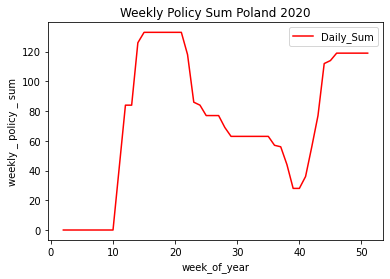

In [121]:
ax = plt.gca()
weekly_policy_2020_poland.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Poland 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

In [122]:

#average weekly independent variable
weekly_policy_2020_poland=weekly_policy_2020_poland/7
weekly_policy_2020_poland.head(10)


Daily_Sum
week_of_year           
2                   0.0
3                   0.0
4                   0.0
5                   0.0
6                   0.0
7                   0.0
8                   0.0
9                   0.0
10                  0.0
11                  6.0

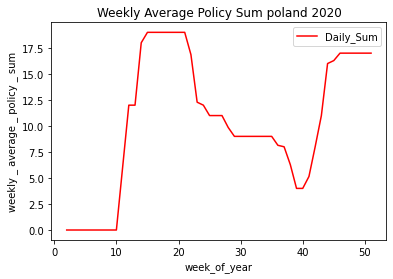

In [123]:
ax = plt.gca()
weekly_policy_2020_poland.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum poland 2020')
plt.ylabel('weekly _ average _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

In [124]:

#the final independent variable in list form 
weekly_policy_2020_poland=weekly_policy_2020_poland['Daily_Sum'].tolist()
print(weekly_policy_2020_poland[:14])



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 18.0, 19.0]


## 2. Prepare the 2020 and 2019 daily ratios for editorship of Poland

In [125]:

#making up the datetime structure 
revs_poland['dateInt']=revs_poland['y'].astype(str) + revs_poland['m'].astype(str).str.zfill(2)+ revs_poland['d'].astype(str).str.zfill(2)
revs_poland['Date'] = pd.to_datetime(revs_poland['dateInt'], format='%Y%m%d')      
revs_poland = revs_poland.reset_index()


In [126]:
revs_poland.head()

index     y  m  d  h    c   dateInt       Date
0      0  2018  1  1  0  247  20180101 2018-01-01
1      1  2018  1  1  1  189  20180101 2018-01-01
2      2  2018  1  1  2   98  20180101 2018-01-01
3      3  2018  1  1  3  161  20180101 2018-01-01
4      4  2018  1  1  4   75  20180101 2018-01-01

In [127]:

#extract the week number and add it as a new column
revs_poland['week_of_year']= revs_poland['Date'].apply(lambda x: x.isocalendar()[1])
#extract the hour of the week
#revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: 24*x.weekday()) + revs_poland['h']



In [128]:

revs_poland_2019=revs_poland.loc[(revs_poland['Date'] >= '2019-01-01 00:00:00') & (revs_poland['Date'] < '2020-01-01 00:00:00') & (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]
revs_poland_2020=revs_poland.loc[(revs_poland['Date'] >= '2020-01-01 00:00:00') & (revs_poland['Date'] < '2021-01-01 00:00:00')& (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]


In [129]:
grouped_poland_2020=revs_poland_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_poland_2020 = grouped_poland_2020.reset_index()
grouped_poland_2020.head(20)

week_of_year  hour_of_week  index     y  m  d   h     c
0              2             0  17640  2020  1  6   0   537
1              2             1  17641  2020  1  6   1    88
2              2             2  17642  2020  1  6   2    47
3              2             3  17643  2020  1  6   3    52
4              2             4  17644  2020  1  6   4    33
5              2             5  17645  2020  1  6   5    91
6              2             6  17646  2020  1  6   6    46
7              2             7  17647  2020  1  6   7   140
8              2             8  17648  2020  1  6   8   208
9              2             9  17649  2020  1  6   9   269
10             2            10  17650  2020  1  6  10   386
11             2            11  17651  2020  1  6  11   513
12             2            12  17652  2020  1  6  12   444
13             2            13  17653  2020  1  6  13   431
14             2            14  17654  2020  1  6  14   584
15             2            15  17655  2020  1  6  15   436
16             2            16  17656  2020  1  6  16  1036
17             2            17  17657  2020  1  6  17  1384
18             2            18  17658  2020  1  6  18  1115
19             2            19  17659  2020  1  6  19   440

In [130]:

array_weekly_events_poland_2020 = np.zeros((52,168))
for  i in range (grouped_poland_2020.shape[0]):
    
    week=grouped_poland_2020.iloc[i]['week_of_year']
    hour=grouped_poland_2020.iloc[i]['hour_of_week']
    array_weekly_events_poland_2020[week][hour]= grouped_poland_2020.iloc[i]['c']
    

In [131]:
print(array_weekly_events_poland_2020)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [537.  88.  47. ... 347. 481. 341.]
 ...
 [343.  91.  41. ... 540. 455. 243.]
 [132.  85.  88. ... 567. 445. 257.]
 [165. 207.  86. ... 298. 294. 201.]]


In [132]:
weekly_sum_poland_2020=np.sum(array_weekly_events_poland_2020 , axis=1)
print(weekly_sum_poland_2020)

[     0.      0.  45680.  44749.  43142.  46374.  63660.  61390.  51120.
  57919.  55674.  59889.  69541.  68688.  58324.  57591. 107543.  73371.
  64382.  66537.  68940.  55121.  59265.  56101.  49391.  54014.  64282.
  67845.  78158.  46439.  40676.  40954.  41888.  39295.  48439.  45894.
  48706.  40269.  40511.  48019.  59388.  46492.  50494.  51230.  46553.
  52885.  53432.  68575.  73766.  68108.  52767.  45887.]


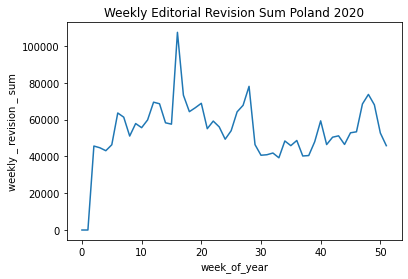

In [133]:
ax = plt.gca()

plt.plot(weekly_sum_poland_2020) 
plt.title('Weekly Editorial Revision Sum Poland 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [134]:

array_weekly_ratios_poland_2020=np.zeros((50,168))
    
for i in range (50):
    
    array_weekly_ratios_poland_2020[i]=array_weekly_events_poland_2020[i+2]/weekly_sum_poland_2020[i+2]



In [135]:


#same for 2019
grouped_poland_2019=revs_poland_2019.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_poland_2019 = grouped_poland_2019.reset_index()


In [136]:


array_weekly_events_poland_2019 = np.zeros((52,168))
for  i in range (grouped_poland_2019.shape[0]):
    
    week=grouped_poland_2019.iloc[i]['week_of_year']
    hour=grouped_poland_2019.iloc[i]['hour_of_week']
    array_weekly_events_poland_2019[week][hour]= grouped_poland_2019.iloc[i]['c']
    

In [137]:
weekly_sum_poland_2019=np.sum(array_weekly_events_poland_2019 , axis=1)
print(weekly_sum_poland_2019)

[    0.     0. 52325. 54718. 56413. 80696. 52175. 69595. 55681. 47686.
 46421. 83086. 51662. 54655. 53803. 45676. 43218. 48446. 44564. 44813.
 40923. 36721. 41684. 35303. 37639. 39838. 34124. 34647. 39605. 35255.
 34858. 33884. 33884. 34291. 58556. 43040. 33126. 34477. 39174. 71400.
 75118. 39004. 41773. 36249. 57272. 42383. 41250. 87147. 68305. 42926.
 44087. 55727.]


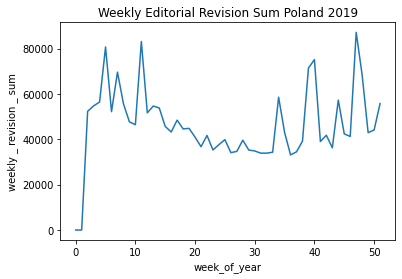

In [138]:
ax = plt.gca()

plt.plot(weekly_sum_poland_2019) 
plt.title('Weekly Editorial Revision Sum Poland 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

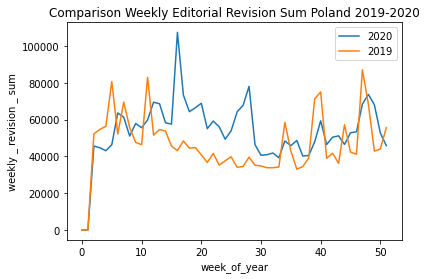

In [139]:
ax = plt.gca()
# '-g', label='2019'
plt.plot(weekly_sum_poland_2020, label='2020') 
plt.plot(weekly_sum_poland_2019, label='2019') 
plt.legend();

plt.title('Comparison Weekly Editorial Revision Sum Poland 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [140]:

array_weekly_ratios_poland_2019=np.zeros((50,168))
    
for i in range (50):
    
    array_weekly_ratios_poland_2019[i]=array_weekly_events_poland_2019[i+2]/weekly_sum_poland_2019[i+2]


No handles with labels found to put in legend.


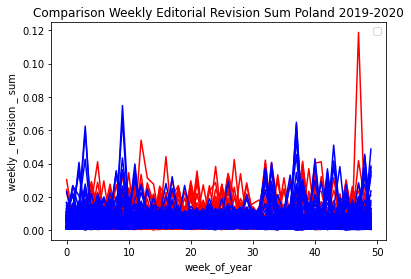

In [141]:
ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_poland_2020, color='red') 
plt.plot(array_weekly_ratios_poland_2019,color='blue') 
plt.legend()

plt.title('Comparison Weekly Editorial Revision Sum Poland 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

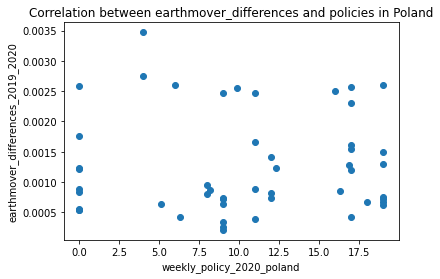

In [142]:

 #earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))


plt.scatter(weekly_policy_2020_poland, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()




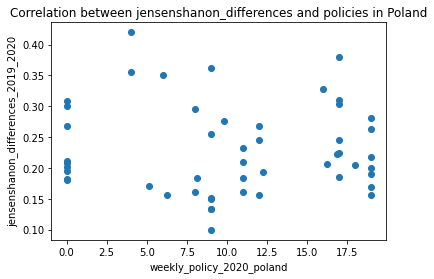

In [143]:

#jensen shanon divergence

jensenshanon_differences= []


for i in range(len(array_weekly_ratios_poland_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    

plt.scatter(weekly_policy_2020_poland, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()




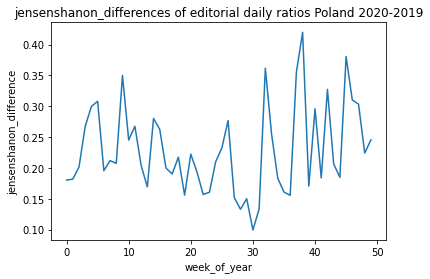

In [144]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

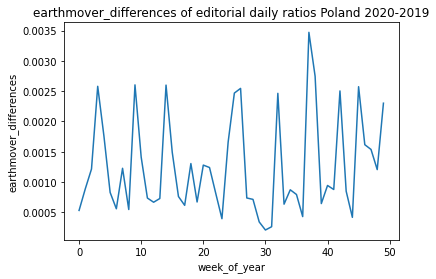

In [145]:
ax = plt.gca()

plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()